# Training of Model
 - Deep Q Reinforcement Learning
 - Model based on following Github: [Link](https://github.com/pskrunner14/trading-bot)
 - Modifications: Second input feature (1 Target, 1 additional Feature)
 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import altair as alt
import datetime
import pandas_datareader.data as web


import matplotlib.pyplot as plt

import logging
import coloredlogs

from train import *
from evaluate import show_eval_result

# Altair:
# in case of error on notebook: Istll vega_datasets
#conda install -c conda-forge altair vega_datasets notebook vega
#see also https://altair-viz.github.io/getting_started/installation.html
alt.renderers.enable('notebook')

Using TensorFlow backend.


[[0.5        0.5        0.5        0.5        0.00247262 0.99330715]]
(1, 6)


RendererRegistry.enable('notebook')

## Set relevant parameters
 - Window-Size: cutout of stock data that agent gets as state for his decision making
 - ep_count: # of epochs
 - Model Name (model saved automatically after 10 epochs)
 - Pretrained: Load Pretrained Model or create new one

In [2]:
window_size = 12
batch_size = 20 #16
ep_count = 150 # 3-5 for debugging, otherwise 20-100
model_name = 'model_w12v4'
pretrained = False
debug = False
TStocks = ['ADBE', 'AAPL', 'AMZN', 'CERN', 'CRM','EXPE','RCL', 'WYNN', 'ADP', 'LOW', 'ARCB', 'ANF', 'MTH']
# Stocks for training and testing

## Load Datasets into pandas DataFrame
__Training on different Stocks:__
 - Growth: Adobe (ADBE), Apple (AAPL), Amazon (AMZN), Cerner (CERN), Salesforce(CRM), Expedia(EXPE)
 - Cyclical: Royal Caribbean (RCL), Wynn Resorts(WYNN)
 - Slow and low dividend: Costco (COST), ADP(ADP), Lowe's(LOW)
 - Turnaround: ArcBest Trucking(ARCB), Abercombie&Fitch(ANF), Meritage Homes(MTH)
 - Second Feature: Gold


Symbols          AAPL       ADBE        ADP        AMZN        ANF       ARCB  \
Date                                                                            
2012-01-03  51.269413  28.570000  39.757862  179.029999  37.513138  17.979559   
2012-01-04  51.544937  28.280001  39.714073  177.509995  36.262455  18.276583   
2012-01-05  52.117188  28.480000  40.006092  177.610001  35.211254  18.452946   
2012-01-06  52.662014  28.719999  40.064480  182.610001  34.459309  18.861364   
2012-01-09  52.578468  28.530001  39.911171  178.559998  35.011761  18.870644   

Symbols          CERN        CRM       EXPE        LOW        MTH        RCL  \
Date                                                                           
2012-01-03  31.115179  25.299999  27.385767  22.221781  23.780001  22.028625   
2012-01-04  30.702301  24.370001  26.804073  23.049004  23.709999  22.215746   
2012-01-05  31.055487  24.692499  26.564005  22.961931  24.299999  22.113682   
2012-01-06  31.572830  25.264999  27.007204  22.935804  24.389999  21.688419   
2012-01-09  31.413649  25.187500  26.434744  22.726822  24.450001  21.756460   

Symbols          WYNN  
Date                   
2012-01-03  86.954262  
2012-01-04  85.458839  
2012-01-05  84.566162  
2012-01-06  81.590660  
2012-01-09  81.361763

<Figure size 1080x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

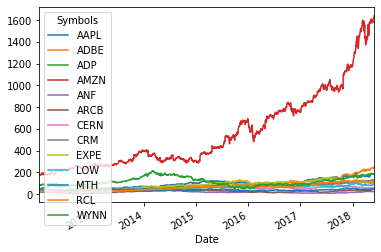

In [3]:
# Loading Train Data
# Setting Start and Enddate for Validation

start_train= datetime.datetime(2012, 1, 1)
end_train = datetime.datetime(2018, 6, 1)
start_val = end_train
end_val = datetime.datetime.now()




# Load Train Data

# Load Target Feature
df_train = web.DataReader(TStocks,'yahoo',
                               start=start_train, end=end_train)['Adj Close']

# Load Second Feature (Gold as a sign for crysis)
df2_train = web.DataReader('GOLD','yahoo',
                               start=start_train, #start_train
                               end=end_train) #end_train


df_val = web.DataReader(TStocks,'yahoo',
                               start=start_val, #start_train
                               end=end_val)['Adj Close'] #end_val
df2_val = web.DataReader('GOLD','yahoo',
                               start=start_val, #start_val
                               end=end_val)  #end_val


# Convert df2_test to list
df2_train_list = list(df2_train['Adj Close'])
df2_val_list = list(df2_val['Adj Close'])

plt.figure(figsize = (15,5))
plt.figure();
df_train.plot();
df_train.head()

## Training of Model
 - Create new model for every stock
 - Training 1 model on all stocks led to poor results

I1010 07:31:58.281943 18676 train.py:156] switching to TensorFlow for CPU
2019-10-10 07:31:58 PC-Stefan root[18784] DEBUG switching to TensorFlow for CPU


model_w12v4_AAPL


W1010 07:31:58.328678 18676 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

2019-10-10 07:31:58 PC-Stefan tensorflow[18784] WARNING From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1010 07:31:58.328678 18676 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

2019-10-10 07:31:58 PC-Stefan tensorflow[18784] WARNING From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1010 07:31:58.344

2019-10-10 07:35:54 PC-Stefan root[18784] INFO Episode 13/150 - Train Position: +$94.22  Val Position: +$119.30  Train Loss: 0.1226  (~18.0591 secs)
Episode 14/150: 100%|██████████| 1613/1613 [00:18<00:00, 88.53it/s]
I1010 07:36:12.615843 18676 train.py:147] Episode 14/150 - Train Position: +$162.87  Val Position: +$57.41  Train Loss: 0.1118  (~18.2288 secs)
2019-10-10 07:36:12 PC-Stefan root[18784] INFO Episode 14/150 - Train Position: +$162.87  Val Position: +$57.41  Train Loss: 0.1118  (~18.2288 secs)
Episode 15/150: 100%|██████████| 1613/1613 [00:18<00:00, 89.12it/s]
I1010 07:36:30.808974 18676 train.py:147] Episode 15/150 - Train Position: +$34.64  Val Position: +$177.34  Train Loss: 0.1577  (~18.0932 secs)
2019-10-10 07:36:30 PC-Stefan root[18784] INFO Episode 15/150 - Train Position: +$34.64  Val Position: +$177.34  Train Loss: 0.1577  (~18.0932 secs)
Episode 16/150: 100%|██████████| 1613/1613 [00:17<00:00, 90.08it/s]
I1010 07:36:48.809816 18676 train.py:147] Episode 16/150 - Tr

2019-10-10 07:42:49 PC-Stefan root[18784] INFO Episode 36/150 - Train Position: +$19.33  Val Position: +$272.82  Train Loss: 0.2398  (~17.9565 secs)
Episode 37/150: 100%|██████████| 1613/1613 [00:17<00:00, 90.00it/s]
I1010 07:43:07.778032 18676 train.py:147] Episode 37/150 - Train Position: +$44.53  Val Position: +$231.15  Train Loss: 0.2346  (~17.9235 secs)
2019-10-10 07:43:07 PC-Stefan root[18784] INFO Episode 37/150 - Train Position: +$44.53  Val Position: +$231.15  Train Loss: 0.2346  (~17.9235 secs)
Episode 38/150: 100%|██████████| 1613/1613 [00:18<00:00, 89.47it/s]
I1010 07:43:25.901105 18676 train.py:147] Episode 38/150 - Train Position: +$362.81  Val Position: +$219.64  Train Loss: 0.2522  (~18.0269 secs)
2019-10-10 07:43:25 PC-Stefan root[18784] INFO Episode 38/150 - Train Position: +$362.81  Val Position: +$219.64  Train Loss: 0.2522  (~18.0269 secs)
Episode 39/150: 100%|██████████| 1613/1613 [00:18<00:00, 89.22it/s]
I1010 07:43:44.074126 18676 train.py:147] Episode 39/150 - 

Episode 59/150: 100%|██████████| 1613/1613 [00:17<00:00, 89.84it/s]
I1010 07:49:45.205938 18676 train.py:147] Episode 59/150 - Train Position: +$247.36  Val Position: +$273.02  Train Loss: 0.2727  (~17.9604 secs)
2019-10-10 07:49:45 PC-Stefan root[18784] INFO Episode 59/150 - Train Position: +$247.36  Val Position: +$273.02  Train Loss: 0.2727  (~17.9604 secs)
Episode 60/150: 100%|██████████| 1613/1613 [00:17<00:00, 89.92it/s]
I1010 07:50:03.269642 18676 train.py:147] Episode 60/150 - Train Position: +$260.00  Val Position: +$256.83  Train Loss: 0.2899  (~17.9491 secs)
2019-10-10 07:50:03 PC-Stefan root[18784] INFO Episode 60/150 - Train Position: +$260.00  Val Position: +$256.83  Train Loss: 0.2899  (~17.9491 secs)
Episode 61/150: 100%|██████████| 1613/1613 [00:17<00:00, 89.84it/s]
I1010 07:50:21.333348 18676 train.py:147] Episode 61/150 - Train Position: +$172.39  Val Position: +$330.65  Train Loss: 0.2760  (~17.9560 secs)
2019-10-10 07:50:21 PC-Stefan root[18784] INFO Episode 61/150

2019-10-10 07:56:22 PC-Stefan root[18784] INFO Episode 81/150 - Train Position: +$402.32  Val Position: +$329.00  Train Loss: 0.2802  (~17.9304 secs)
Episode 82/150: 100%|██████████| 1613/1613 [00:17<00:00, 89.95it/s]
I1010 07:56:40.992991 18676 train.py:147] Episode 82/150 - Train Position: +$271.39  Val Position: +$330.33  Train Loss: 0.2831  (~17.9476 secs)
2019-10-10 07:56:40 PC-Stefan root[18784] INFO Episode 82/150 - Train Position: +$271.39  Val Position: +$330.33  Train Loss: 0.2831  (~17.9476 secs)
Episode 83/150: 100%|██████████| 1613/1613 [00:17<00:00, 89.92it/s]
I1010 07:56:59.040991 18676 train.py:147] Episode 83/150 - Train Position: +$347.20  Val Position: +$295.34  Train Loss: 0.2937  (~17.9457 secs)
2019-10-10 07:56:59 PC-Stefan root[18784] INFO Episode 83/150 - Train Position: +$347.20  Val Position: +$295.34  Train Loss: 0.2937  (~17.9457 secs)
Episode 84/150: 100%|██████████| 1613/1613 [00:17<00:00, 89.84it/s]
I1010 07:57:17.104693 18676 train.py:147] Episode 84/150

Episode 104/150: 100%|██████████| 1613/1613 [00:17<00:00, 89.92it/s]
I1010 08:03:18.966993 18676 train.py:147] Episode 104/150 - Train Position: +$412.53  Val Position: +$325.51  Train Loss: 0.2706  (~17.9291 secs)
2019-10-10 08:03:18 PC-Stefan root[18784] INFO Episode 104/150 - Train Position: +$412.53  Val Position: +$325.51  Train Loss: 0.2706  (~17.9291 secs)
Episode 105/150: 100%|██████████| 1613/1613 [00:17<00:00, 90.39it/s]
I1010 08:03:36.905689 18676 train.py:147] Episode 105/150 - Train Position: +$366.37  Val Position: +$244.25  Train Loss: 0.2620  (~17.8465 secs)
2019-10-10 08:03:36 PC-Stefan root[18784] INFO Episode 105/150 - Train Position: +$366.37  Val Position: +$244.25  Train Loss: 0.2620  (~17.8465 secs)
Episode 106/150: 100%|██████████| 1613/1613 [00:17<00:00, 90.39it/s]
I1010 08:03:54.844385 18676 train.py:147] Episode 106/150 - Train Position: +$180.12  Val Position: +$337.93  Train Loss: 0.2408  (~17.8454 secs)
2019-10-10 08:03:54 PC-Stefan root[18784] INFO Episod

2019-10-10 08:09:58 PC-Stefan root[18784] INFO Episode 126/150 - Train Position: +$371.80  Val Position: +$367.84  Train Loss: 0.2886  (~18.0129 secs)
Episode 127/150: 100%|██████████| 1613/1613 [00:18<00:00, 88.76it/s]
I1010 08:10:16.591635 18676 train.py:147] Episode 127/150 - Train Position: +$482.46  Val Position: +$378.75  Train Loss: 0.2739  (~18.1690 secs)
2019-10-10 08:10:16 PC-Stefan root[18784] INFO Episode 127/150 - Train Position: +$482.46  Val Position: +$378.75  Train Loss: 0.2739  (~18.1690 secs)
Episode 128/150: 100%|██████████| 1613/1613 [00:18<00:00, 89.12it/s]
I1010 08:10:34.783669 18676 train.py:147] Episode 128/150 - Train Position: +$389.33  Val Position: +$305.50  Train Loss: 0.3289  (~18.1023 secs)
2019-10-10 08:10:34 PC-Stefan root[18784] INFO Episode 128/150 - Train Position: +$389.33  Val Position: +$305.50  Train Loss: 0.3289  (~18.1023 secs)
Episode 129/150: 100%|██████████| 1613/1613 [00:18<00:00, 89.54it/s]
I1010 08:10:52.906867 18676 train.py:147] Episod

Episode 149/150: 100%|██████████| 1613/1613 [00:18<00:00, 89.61it/s]
I1010 08:16:56.067783 18676 train.py:147] Episode 149/150 - Train Position: +$322.69  Val Position: +$320.92  Train Loss: 0.2363  (~18.0142 secs)
2019-10-10 08:16:56 PC-Stefan root[18784] INFO Episode 149/150 - Train Position: +$322.69  Val Position: +$320.92  Train Loss: 0.2363  (~18.0142 secs)
Episode 150/150: 100%|██████████| 1613/1613 [00:18<00:00, 88.91it/s]
I1010 08:17:14.334626 18676 train.py:147] Episode 150/150 - Train Position: +$273.23  Val Position: +$353.59  Train Loss: 0.2502  (~18.1430 secs)
2019-10-10 08:17:14 PC-Stefan root[18784] INFO Episode 150/150 - Train Position: +$273.23  Val Position: +$353.59  Train Loss: 0.2502  (~18.1430 secs)


model_w12v4_ADBE


Episode 1/150: 100%|██████████| 1613/1613 [00:18<00:00, 85.74it/s]
I1010 08:17:33.318621 18676 train.py:147] Episode 1/150 - Train Position: +$95.46  Val Position: -$22.65  Train Loss: 0.0167  (~18.8091 secs)
2019-10-10 08:17:33 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: +$95.46  Val Position: -$22.65  Train Loss: 0.0167  (~18.8091 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.87it/s]
I1010 08:17:51.994955 18676 train.py:147] Episode 2/150 - Train Position: +$215.07  Val Position: +$52.84  Train Loss: 0.0319  (~18.5665 secs)
2019-10-10 08:17:51 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: +$215.07  Val Position: +$52.84  Train Loss: 0.0319  (~18.5665 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.67it/s]
I1010 08:18:10.699329 18676 train.py:147] Episode 3/150 - Train Position: +$86.17  Val Position: -$18.97  Train Loss: 0.0665  (~18.6112 secs)
2019-10-10 08:18:10 PC-Stefan root[18784] INFO Episode 3/150 - Train Position

2019-10-10 08:24:25 PC-Stefan root[18784] INFO Episode 23/150 - Train Position: +$725.42  Val Position: +$554.74  Train Loss: 0.5489  (~18.6251 secs)
Episode 24/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.48it/s]
I1010 08:24:44.541751 18676 train.py:147] Episode 24/150 - Train Position: +$487.51  Val Position: +$399.39  Train Loss: 0.6024  (~18.6660 secs)
2019-10-10 08:24:44 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: +$487.51  Val Position: +$399.39  Train Loss: 0.6024  (~18.6660 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.69it/s]
I1010 08:25:03.264188 18676 train.py:147] Episode 25/150 - Train Position: +$347.86  Val Position: +$325.27  Train Loss: 0.4037  (~18.6114 secs)
2019-10-10 08:25:03 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$347.86  Val Position: +$325.27  Train Loss: 0.4037  (~18.6114 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.14it/s]
I1010 08:25:22.083890 18676 train.py:147] Episode 26/150

Episode 46/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.74it/s]
I1010 08:31:37.991801 18676 train.py:147] Episode 46/150 - Train Position: +$537.19  Val Position: +$484.63  Train Loss: 0.5443  (~18.5912 secs)
2019-10-10 08:31:37 PC-Stefan root[18784] INFO Episode 46/150 - Train Position: +$537.19  Val Position: +$484.63  Train Loss: 0.5443  (~18.5912 secs)
Episode 47/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.65it/s]
I1010 08:31:56.701223 18676 train.py:147] Episode 47/150 - Train Position: +$512.42  Val Position: +$556.75  Train Loss: 0.6152  (~18.6096 secs)
2019-10-10 08:31:56 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$512.42  Val Position: +$556.75  Train Loss: 0.6152  (~18.6096 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.48it/s]
I1010 08:32:15.447136 18676 train.py:147] Episode 48/150 - Train Position: +$304.44  Val Position: +$386.73  Train Loss: 0.5893  (~18.6516 secs)
2019-10-10 08:32:15 PC-Stefan root[18784] INFO Episode 48/150

2019-10-10 08:38:29 PC-Stefan root[18784] INFO Episode 68/150 - Train Position: +$598.71  Val Position: +$396.47  Train Loss: 0.4074  (~18.5178 secs)
Episode 69/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.24it/s]
I1010 08:38:48.559030 18676 train.py:147] Episode 69/150 - Train Position: +$657.65  Val Position: +$388.73  Train Loss: 0.4272  (~18.7077 secs)
2019-10-10 08:38:48 PC-Stefan root[18784] INFO Episode 69/150 - Train Position: +$657.65  Val Position: +$388.73  Train Loss: 0.4272  (~18.7077 secs)
Episode 70/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.60it/s]
I1010 08:39:07.325587 18676 train.py:147] Episode 70/150 - Train Position: +$581.54  Val Position: +$399.33  Train Loss: 0.4158  (~18.6253 secs)
2019-10-10 08:39:07 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$581.54  Val Position: +$399.33  Train Loss: 0.4158  (~18.6253 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.96it/s]
I1010 08:39:25.983079 18676 train.py:147] Episode 71/150

Episode 91/150: 100%|██████████| 1613/1613 [00:18<00:00, 87.19it/s]
I1010 08:45:38.465523 18676 train.py:147] Episode 91/150 - Train Position: +$555.93  Val Position: +$517.34  Train Loss: 0.3895  (~18.5035 secs)
2019-10-10 08:45:38 PC-Stefan root[18784] INFO Episode 91/150 - Train Position: +$555.93  Val Position: +$517.34  Train Loss: 0.3895  (~18.5035 secs)
Episode 92/150: 100%|██████████| 1613/1613 [00:18<00:00, 87.54it/s]
I1010 08:45:56.984758 18676 train.py:147] Episode 92/150 - Train Position: +$781.33  Val Position: +$384.60  Train Loss: 0.5096  (~18.4224 secs)
2019-10-10 08:45:56 PC-Stefan root[18784] INFO Episode 92/150 - Train Position: +$781.33  Val Position: +$384.60  Train Loss: 0.5096  (~18.4224 secs)
Episode 93/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.82it/s]
I1010 08:46:15.673504 18676 train.py:147] Episode 93/150 - Train Position: +$586.45  Val Position: +$433.69  Train Loss: 0.4869  (~18.5780 secs)
2019-10-10 08:46:15 PC-Stefan root[18784] INFO Episode 93/150

2019-10-10 08:52:29 PC-Stefan root[18784] INFO Episode 113/150 - Train Position: +$568.18  Val Position: +$345.98  Train Loss: 0.3260  (~18.6383 secs)
Episode 114/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.31it/s]
I1010 08:52:48.039927 18676 train.py:147] Episode 114/150 - Train Position: +$560.32  Val Position: +$407.69  Train Loss: 0.3237  (~18.6856 secs)
2019-10-10 08:52:48 PC-Stefan root[18784] INFO Episode 114/150 - Train Position: +$560.32  Val Position: +$407.69  Train Loss: 0.3237  (~18.6856 secs)
Episode 115/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.75it/s]
I1010 08:53:06.743274 18676 train.py:147] Episode 115/150 - Train Position: +$422.46  Val Position: +$358.38  Train Loss: 0.3102  (~18.5978 secs)
2019-10-10 08:53:06 PC-Stefan root[18784] INFO Episode 115/150 - Train Position: +$422.46  Val Position: +$358.38  Train Loss: 0.3102  (~18.5978 secs)
Episode 116/150: 100%|██████████| 1613/1613 [00:18<00:00, 87.18it/s]
I1010 08:53:25.353902 18676 train.py:147] Episod

Episode 136/150: 100%|██████████| 1613/1613 [00:18<00:00, 87.10it/s]
I1010 08:59:39.187478 18676 train.py:147] Episode 136/150 - Train Position: +$550.51  Val Position: +$439.74  Train Loss: 0.3380  (~18.5118 secs)
2019-10-10 08:59:39 PC-Stefan root[18784] INFO Episode 136/150 - Train Position: +$550.51  Val Position: +$439.74  Train Loss: 0.3380  (~18.5118 secs)
Episode 137/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.16it/s]
I1010 08:59:58.001232 18676 train.py:147] Episode 137/150 - Train Position: +$519.27  Val Position: +$449.80  Train Loss: 0.3273  (~18.7107 secs)
2019-10-10 08:59:58 PC-Stefan root[18784] INFO Episode 137/150 - Train Position: +$519.27  Val Position: +$449.80  Train Loss: 0.3273  (~18.7107 secs)
Episode 138/150: 100%|██████████| 1613/1613 [00:18<00:00, 86.71it/s]
I1010 09:00:16.697125 18676 train.py:147] Episode 138/150 - Train Position: +$507.86  Val Position: +$425.15  Train Loss: 0.3189  (~18.5929 secs)
2019-10-10 09:00:16 PC-Stefan root[18784] INFO Episod

model_w12v4_ADP


Episode 1/150: 100%|██████████| 1613/1613 [00:19<00:00, 82.85it/s]
I1010 09:04:20.905276 18676 train.py:147] Episode 1/150 - Train Position: +$38.40  Val Position: +$37.88  Train Loss: 0.0113  (~19.4676 secs)
2019-10-10 09:04:20 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: +$38.40  Val Position: +$37.88  Train Loss: 0.0113  (~19.4676 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.49it/s]
I1010 09:04:40.349733 18676 train.py:147] Episode 2/150 - Train Position: +$52.16  Val Position: +$16.36  Train Loss: 0.0362  (~19.3327 secs)
2019-10-10 09:04:40 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: +$52.16  Val Position: +$16.36  Train Loss: 0.0362  (~19.3327 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.88it/s]
I1010 09:04:59.689435 18676 train.py:147] Episode 3/150 - Train Position: +$109.96  Val Position: +$114.89  Train Loss: 0.0192  (~19.2331 secs)
2019-10-10 09:04:59 PC-Stefan root[18784] INFO Episode 3/150 - Train Position

Episode 24/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.79it/s]
I1010 09:11:47.066310 18676 train.py:147] Episode 24/150 - Train Position: +$152.78  Val Position: +$98.90  Train Loss: 0.1008  (~19.2539 secs)
2019-10-10 09:11:47 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: +$152.78  Val Position: +$98.90  Train Loss: 0.1008  (~19.2539 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.81it/s]
I1010 09:12:06.422678 18676 train.py:147] Episode 25/150 - Train Position: +$188.95  Val Position: +$121.99  Train Loss: 0.0793  (~19.2546 secs)
2019-10-10 09:12:06 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$188.95  Val Position: +$121.99  Train Loss: 0.0793  (~19.2546 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.70it/s]
I1010 09:12:25.818184 18676 train.py:147] Episode 26/150 - Train Position: +$187.06  Val Position: +$151.27  Train Loss: 0.1137  (~19.2823 secs)
2019-10-10 09:12:25 PC-Stefan root[18784] INFO Episode 26/150 -

2019-10-10 09:18:54 PC-Stefan root[18784] INFO Episode 46/150 - Train Position: +$169.82  Val Position: +$206.07  Train Loss: 0.1202  (~19.2741 secs)
Episode 47/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.55it/s]
I1010 09:19:13.557307 18676 train.py:147] Episode 47/150 - Train Position: +$164.06  Val Position: +$117.39  Train Loss: 0.1240  (~19.3108 secs)
2019-10-10 09:19:13 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$164.06  Val Position: +$117.39  Train Loss: 0.1240  (~19.3108 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.38it/s]
I1010 09:19:33.012199 18676 train.py:147] Episode 48/150 - Train Position: +$285.41  Val Position: +$123.36  Train Loss: 0.1252  (~19.3452 secs)
2019-10-10 09:19:33 PC-Stefan root[18784] INFO Episode 48/150 - Train Position: +$285.41  Val Position: +$123.36  Train Loss: 0.1252  (~19.3452 secs)
Episode 49/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.73it/s]
I1010 09:19:52.386911 18676 train.py:147] Episode 49/150

Episode 69/150: 100%|██████████| 1613/1613 [00:19<00:00, 84.03it/s]
I1010 09:26:20.177347 18676 train.py:147] Episode 69/150 - Train Position: +$198.58  Val Position: +$198.38  Train Loss: 0.1344  (~19.1881 secs)
2019-10-10 09:26:20 PC-Stefan root[18784] INFO Episode 69/150 - Train Position: +$198.58  Val Position: +$198.38  Train Loss: 0.1344  (~19.1881 secs)
Episode 70/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.45it/s]
I1010 09:26:39.631772 18676 train.py:147] Episode 70/150 - Train Position: +$108.42  Val Position: +$225.61  Train Loss: 0.1434  (~19.3334 secs)
2019-10-10 09:26:39 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$108.42  Val Position: +$225.61  Train Loss: 0.1434  (~19.3334 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.65it/s]
I1010 09:26:59.023689 18676 train.py:147] Episode 71/150 - Train Position: +$217.66  Val Position: +$216.11  Train Loss: 0.1398  (~19.2840 secs)
2019-10-10 09:26:59 PC-Stefan root[18784] INFO Episode 71/150

2019-10-10 09:33:26 PC-Stefan root[18784] INFO Episode 91/150 - Train Position: +$138.79  Val Position: +$194.81  Train Loss: 0.1306  (~19.2046 secs)
Episode 92/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.79it/s]
I1010 09:33:45.723793 18676 train.py:147] Episode 92/150 - Train Position: +$255.28  Val Position: +$214.85  Train Loss: 0.1475  (~19.2644 secs)
2019-10-10 09:33:45 PC-Stefan root[18784] INFO Episode 92/150 - Train Position: +$255.28  Val Position: +$214.85  Train Loss: 0.1475  (~19.2644 secs)
Episode 93/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.65it/s]
I1010 09:34:05.100086 18676 train.py:147] Episode 93/150 - Train Position: +$138.38  Val Position: +$272.46  Train Loss: 0.1513  (~19.2704 secs)
2019-10-10 09:34:05 PC-Stefan root[18784] INFO Episode 93/150 - Train Position: +$138.38  Val Position: +$272.46  Train Loss: 0.1513  (~19.2704 secs)
Episode 94/150: 100%|██████████| 1613/1613 [00:19<00:00, 84.20it/s]
I1010 09:34:24.366997 18676 train.py:147] Episode 94/150

Episode 114/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.73it/s]
I1010 09:40:51.981242 18676 train.py:147] Episode 114/150 - Train Position: +$240.26  Val Position: +$220.02  Train Loss: 0.1360  (~19.2699 secs)
2019-10-10 09:40:51 PC-Stefan root[18784] INFO Episode 114/150 - Train Position: +$240.26  Val Position: +$220.02  Train Loss: 0.1360  (~19.2699 secs)
Episode 115/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.79it/s]
I1010 09:41:11.357533 18676 train.py:147] Episode 115/150 - Train Position: +$162.40  Val Position: +$201.83  Train Loss: 0.1242  (~19.2602 secs)
2019-10-10 09:41:11 PC-Stefan root[18784] INFO Episode 115/150 - Train Position: +$162.40  Val Position: +$201.83  Train Loss: 0.1242  (~19.2602 secs)
Episode 116/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.72it/s]
I1010 09:41:30.718199 18676 train.py:147] Episode 116/150 - Train Position: +$212.26  Val Position: +$245.22  Train Loss: 0.1246  (~19.2632 secs)
2019-10-10 09:41:30 PC-Stefan root[18784] INFO Episod

2019-10-10 09:47:57 PC-Stefan root[18784] INFO Episode 136/150 - Train Position: +$181.09  Val Position: +$258.48  Train Loss: 0.1166  (~19.1915 secs)
Episode 137/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.99it/s]
I1010 09:48:17.229891 18676 train.py:147] Episode 137/150 - Train Position: +$141.66  Val Position: +$272.77  Train Loss: 0.1270  (~19.2123 secs)
2019-10-10 09:48:17 PC-Stefan root[18784] INFO Episode 137/150 - Train Position: +$141.66  Val Position: +$272.77  Train Loss: 0.1270  (~19.2123 secs)
Episode 138/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.52it/s]
I1010 09:48:36.652770 18676 train.py:147] Episode 138/150 - Train Position: +$227.35  Val Position: +$244.96  Train Loss: 0.1280  (~19.3138 secs)
2019-10-10 09:48:36 PC-Stefan root[18784] INFO Episode 138/150 - Train Position: +$227.35  Val Position: +$244.96  Train Loss: 0.1280  (~19.3138 secs)
Episode 139/150: 100%|██████████| 1613/1613 [00:19<00:00, 83.79it/s]
I1010 09:48:56.013439 18676 train.py:147] Episod

model_w12v4_AMZN


Episode 1/150: 100%|██████████| 1613/1613 [00:20<00:00, 80.24it/s]
I1010 09:52:49.760652 18676 train.py:147] Episode 1/150 - Train Position: +$682.04  Val Position: +$164.53  Train Loss: 0.2629  (~20.1039 secs)
2019-10-10 09:52:49 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: +$682.04  Val Position: +$164.53  Train Loss: 0.2629  (~20.1039 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.67it/s]
I1010 09:53:09.621352 18676 train.py:147] Episode 2/150 - Train Position: +$918.18  Val Position: -$356.95  Train Loss: 0.3584  (~19.7537 secs)
2019-10-10 09:53:09 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: +$918.18  Val Position: -$356.95  Train Loss: 0.3584  (~19.7537 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.67it/s]
I1010 09:53:29.497326 18676 train.py:147] Episode 3/150 - Train Position: +$1503.76  Val Position: -$19.34  Train Loss: 0.7207  (~19.7565 secs)
2019-10-10 09:53:29 PC-Stefan root[18784] INFO Episode 3/150 - Train 

2019-10-10 10:00:07 PC-Stefan root[18784] INFO Episode 23/150 - Train Position: +$2187.66  Val Position: +$812.08  Train Loss: 1.9995  (~19.8331 secs)
Episode 24/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.49it/s]
I1010 10:00:27.683917 18676 train.py:147] Episode 24/150 - Train Position: +$2438.55  Val Position: +$1046.41  Train Loss: 1.6915  (~19.7842 secs)
2019-10-10 10:00:27 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: +$2438.55  Val Position: +$1046.41  Train Loss: 1.6915  (~19.7842 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.62it/s]
I1010 10:00:47.572156 18676 train.py:147] Episode 25/150 - Train Position: +$2491.35  Val Position: +$328.77  Train Loss: 1.8037  (~19.7788 secs)
2019-10-10 10:00:47 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$2491.35  Val Position: +$328.77  Train Loss: 1.8037  (~19.7788 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.24it/s]
I1010 10:01:07.521320 18676 train.py:147] Episode

Episode 46/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.28it/s]
I1010 10:07:45.965562 18676 train.py:147] Episode 46/150 - Train Position: +$3149.07  Val Position: -$242.79  Train Loss: 2.5108  (~19.8538 secs)
2019-10-10 10:07:45 PC-Stefan root[18784] INFO Episode 46/150 - Train Position: +$3149.07  Val Position: -$242.79  Train Loss: 2.5108  (~19.8538 secs)
Episode 47/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.28it/s]
I1010 10:08:05.920017 18676 train.py:147] Episode 47/150 - Train Position: +$3397.69  Val Position: +$1203.32  Train Loss: 2.8551  (~19.8485 secs)
2019-10-10 10:08:05 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$3397.69  Val Position: +$1203.32  Train Loss: 2.8551  (~19.8485 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.79it/s]
I1010 10:08:25.749464 18676 train.py:147] Episode 48/150 - Train Position: +$2893.45  Val Position: +$430.16  Train Loss: 2.4759  (~19.7193 secs)
2019-10-10 10:08:25 PC-Stefan root[18784] INFO Episode

2019-10-10 10:15:04 PC-Stefan root[18784] INFO Episode 68/150 - Train Position: +$2163.15  Val Position: +$179.92  Train Loss: 2.0011  (~19.7844 secs)
Episode 69/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.53it/s]
I1010 10:15:24.457082 18676 train.py:147] Episode 69/150 - Train Position: +$2449.57  Val Position: -$8.68  Train Loss: 2.9293  (~19.7813 secs)
2019-10-10 10:15:24 PC-Stefan root[18784] INFO Episode 69/150 - Train Position: +$2449.57  Val Position: -$8.68  Train Loss: 2.9293  (~19.7813 secs)
Episode 70/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.41it/s]
I1010 10:15:44.411540 18676 train.py:147] Episode 70/150 - Train Position: +$2307.97  Val Position: +$940.38  Train Loss: 2.2700  (~19.8174 secs)
2019-10-10 10:15:44 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$2307.97  Val Position: +$940.38  Train Loss: 2.2700  (~19.8174 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.41it/s]
I1010 10:16:04.334750 18676 train.py:147] Episode 71/15

Episode 91/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.49it/s]
I1010 10:22:43.228308 18676 train.py:147] Episode 91/150 - Train Position: +$2533.58  Val Position: +$1453.66  Train Loss: 2.9095  (~19.7981 secs)
2019-10-10 10:22:43 PC-Stefan root[18784] INFO Episode 91/150 - Train Position: +$2533.58  Val Position: +$1453.66  Train Loss: 2.9095  (~19.7981 secs)
Episode 92/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.79it/s]
I1010 10:23:03.074908 18676 train.py:147] Episode 92/150 - Train Position: +$2195.73  Val Position: +$1651.64  Train Loss: 2.7335  (~19.7280 secs)
2019-10-10 10:23:03 PC-Stefan root[18784] INFO Episode 92/150 - Train Position: +$2195.73  Val Position: +$1651.64  Train Loss: 2.7335  (~19.7280 secs)
Episode 93/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.47it/s]
I1010 10:23:22.982145 18676 train.py:147] Episode 93/150 - Train Position: +$2277.94  Val Position: +$907.28  Train Loss: 2.2171  (~19.8013 secs)
2019-10-10 10:23:22 PC-Stefan root[18784] INFO Episo

2019-10-10 10:30:01 PC-Stefan root[18784] INFO Episode 113/150 - Train Position: +$2605.07  Val Position: +$1557.78  Train Loss: 2.7919  (~19.7372 secs)
Episode 114/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.67it/s]
I1010 10:30:21.471585 18676 train.py:147] Episode 114/150 - Train Position: +$2569.92  Val Position: +$1984.94  Train Loss: 2.4284  (~19.7566 secs)
2019-10-10 10:30:21 PC-Stefan root[18784] INFO Episode 114/150 - Train Position: +$2569.92  Val Position: +$1984.94  Train Loss: 2.4284  (~19.7566 secs)
Episode 115/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.28it/s]
I1010 10:30:41.410413 18676 train.py:147] Episode 115/150 - Train Position: +$2334.12  Val Position: +$1280.93  Train Loss: 2.2472  (~19.8423 secs)
2019-10-10 10:30:41 PC-Stefan root[18784] INFO Episode 115/150 - Train Position: +$2334.12  Val Position: +$1280.93  Train Loss: 2.2472  (~19.8423 secs)
Episode 116/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.21it/s]
I1010 10:31:01.397120 18676 train.py:1

Episode 136/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.54it/s]
I1010 10:37:40.552748 18676 train.py:147] Episode 136/150 - Train Position: +$3157.30  Val Position: +$2196.93  Train Loss: 2.9767  (~19.7918 secs)
2019-10-10 10:37:40 PC-Stefan root[18784] INFO Episode 136/150 - Train Position: +$3157.30  Val Position: +$2196.93  Train Loss: 2.9767  (~19.7918 secs)
Episode 137/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.60it/s]
I1010 10:38:00.444700 18676 train.py:147] Episode 137/150 - Train Position: +$2070.02  Val Position: +$2324.80  Train Loss: 2.8108  (~19.7793 secs)
2019-10-10 10:38:00 PC-Stefan root[18784] INFO Episode 137/150 - Train Position: +$2070.02  Val Position: +$2324.80  Train Loss: 2.8108  (~19.7793 secs)
Episode 138/150: 100%|██████████| 1613/1613 [00:19<00:00, 81.54it/s]
I1010 10:38:20.336708 18676 train.py:147] Episode 138/150 - Train Position: +$2754.66  Val Position: +$2523.25  Train Loss: 2.7492  (~19.7839 secs)
2019-10-10 10:38:20 PC-Stefan root[18784] I

model_w12v4_ANF


Episode 1/150: 100%|██████████| 1613/1613 [00:20<00:00, 76.86it/s]
I1010 10:42:41.240584 18676 train.py:147] Episode 1/150 - Train Position: -$20.92  Val Position: -$4.93  Train Loss: 0.0194  (~20.9923 secs)
2019-10-10 10:42:41 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: -$20.92  Val Position: -$4.93  Train Loss: 0.0194  (~20.9923 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.32it/s]
I1010 10:43:01.960720 18676 train.py:147] Episode 2/150 - Train Position: +$16.11  Val Position: +$0.01  Train Loss: 0.0088  (~20.6005 secs)
2019-10-10 10:43:01 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: +$16.11  Val Position: +$0.01  Train Loss: 0.0088  (~20.6005 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.56it/s]
I1010 10:43:22.602718 18676 train.py:147] Episode 3/150 - Train Position: -$92.10  Val Position: -$4.23  Train Loss: 0.0110  (~20.5280 secs)
2019-10-10 10:43:22 PC-Stefan root[18784] INFO Episode 3/150 - Train Position: -$92.

Episode 24/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.44it/s]
I1010 10:50:36.386714 18676 train.py:147] Episode 24/150 - Train Position: -$2.84  Val Position: +$8.45  Train Loss: 0.0554  (~20.5654 secs)
2019-10-10 10:50:36 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: -$2.84  Val Position: +$8.45  Train Loss: 0.0554  (~20.5654 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.62it/s]
I1010 10:50:57.012762 18676 train.py:147] Episode 25/150 - Train Position: +$72.24  Val Position: -$0.13  Train Loss: 0.0472  (~20.5162 secs)
2019-10-10 10:50:57 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$72.24  Val Position: -$0.13  Train Loss: 0.0472  (~20.5162 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.38it/s]
I1010 10:51:17.715755 18676 train.py:147] Episode 26/150 - Train Position: +$113.56  Val Position: +$2.66  Train Loss: 0.0527  (~20.5915 secs)
2019-10-10 10:51:17 PC-Stefan root[18784] INFO Episode 26/150 - Train Positio

Episode 47/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.44it/s]
I1010 10:58:31.033937 18676 train.py:147] Episode 47/150 - Train Position: +$115.40  Val Position: +$24.67  Train Loss: 0.0625  (~20.5660 secs)
2019-10-10 10:58:31 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$115.40  Val Position: +$24.67  Train Loss: 0.0625  (~20.5660 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.71it/s]
I1010 10:58:51.651647 18676 train.py:147] Episode 48/150 - Train Position: +$41.99  Val Position: +$62.38  Train Loss: 0.0663  (~20.4939 secs)
2019-10-10 10:58:51 PC-Stefan root[18784] INFO Episode 48/150 - Train Position: +$41.99  Val Position: +$62.38  Train Loss: 0.0663  (~20.4939 secs)
Episode 49/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.68it/s]
I1010 10:59:12.262387 18676 train.py:147] Episode 49/150 - Train Position: +$78.04  Val Position: +$1.55  Train Loss: 0.0774  (~20.5044 secs)
2019-10-10 10:59:12 PC-Stefan root[18784] INFO Episode 49/150 - Train 

Episode 70/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.26it/s]
I1010 11:06:26.337271 18676 train.py:147] Episode 70/150 - Train Position: +$39.37  Val Position: -$26.45  Train Loss: 0.0632  (~20.6009 secs)
2019-10-10 11:06:26 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$39.37  Val Position: -$26.45  Train Loss: 0.0632  (~20.6009 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.74it/s]
I1010 11:06:46.932296 18676 train.py:147] Episode 71/150 - Train Position: +$54.53  Val Position: +$12.98  Train Loss: 0.0874  (~20.4823 secs)
2019-10-10 11:06:46 PC-Stefan root[18784] INFO Episode 71/150 - Train Position: +$54.53  Val Position: +$12.98  Train Loss: 0.0874  (~20.4823 secs)
Episode 72/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.80it/s]
I1010 11:07:07.496168 18676 train.py:147] Episode 72/150 - Train Position: +$80.35  Val Position: -$3.71  Train Loss: 0.0757  (~20.4669 secs)
2019-10-10 11:07:07 PC-Stefan root[18784] INFO Episode 72/150 - Train Po

Episode 93/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.57it/s]
I1010 11:14:20.934998 18676 train.py:147] Episode 93/150 - Train Position: +$90.91  Val Position: -$7.71  Train Loss: 0.0557  (~20.5213 secs)
2019-10-10 11:14:20 PC-Stefan root[18784] INFO Episode 93/150 - Train Position: +$90.91  Val Position: -$7.71  Train Loss: 0.0557  (~20.5213 secs)
Episode 94/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.42it/s]
I1010 11:14:41.612576 18676 train.py:147] Episode 94/150 - Train Position: +$37.88  Val Position: +$4.57  Train Loss: 0.0549  (~20.5685 secs)
2019-10-10 11:14:41 PC-Stefan root[18784] INFO Episode 94/150 - Train Position: +$37.88  Val Position: +$4.57  Train Loss: 0.0549  (~20.5685 secs)
Episode 95/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.26it/s]
I1010 11:15:02.332707 18676 train.py:147] Episode 95/150 - Train Position: +$144.39  Val Position: +$0.29  Train Loss: 0.0587  (~20.6089 secs)
2019-10-10 11:15:02 PC-Stefan root[18784] INFO Episode 95/150 - Train Posit

2019-10-10 11:21:55 PC-Stefan root[18784] INFO Episode 115/150 - Train Position: +$158.40  Val Position: -$14.40  Train Loss: 0.0780  (~20.6186 secs)
Episode 116/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.44it/s]
I1010 11:22:16.154241 18676 train.py:147] Episode 116/150 - Train Position: +$191.24  Val Position: -$48.88  Train Loss: 0.0708  (~20.5750 secs)
2019-10-10 11:22:16 PC-Stefan root[18784] INFO Episode 116/150 - Train Position: +$191.24  Val Position: -$48.88  Train Loss: 0.0708  (~20.5750 secs)
Episode 117/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.68it/s]
I1010 11:22:36.780617 18676 train.py:147] Episode 117/150 - Train Position: +$172.02  Val Position: +$9.17  Train Loss: 0.0753  (~20.5108 secs)
2019-10-10 11:22:36 PC-Stefan root[18784] INFO Episode 117/150 - Train Position: +$172.02  Val Position: +$9.17  Train Loss: 0.0753  (~20.5108 secs)
Episode 118/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.65it/s]
I1010 11:22:57.399662 18676 train.py:147] Episode 118/1

Episode 138/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.44it/s]
I1010 11:29:50.749189 18676 train.py:147] Episode 138/150 - Train Position: +$234.52  Val Position: -$10.00  Train Loss: 0.0604  (~20.5585 secs)
2019-10-10 11:29:50 PC-Stefan root[18784] INFO Episode 138/150 - Train Position: +$234.52  Val Position: -$10.00  Train Loss: 0.0604  (~20.5585 secs)
Episode 139/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.23it/s]
I1010 11:30:11.460988 18676 train.py:147] Episode 139/150 - Train Position: +$111.51  Val Position: +$19.23  Train Loss: 0.0655  (~20.6086 secs)
2019-10-10 11:30:11 PC-Stefan root[18784] INFO Episode 139/150 - Train Position: +$111.51  Val Position: +$19.23  Train Loss: 0.0655  (~20.6086 secs)
Episode 140/150: 100%|██████████| 1613/1613 [00:20<00:00, 78.68it/s]
I1010 11:30:32.102992 18676 train.py:147] Episode 140/150 - Train Position: +$183.29  Val Position: +$16.61  Train Loss: 0.0642  (~20.5090 secs)
2019-10-10 11:30:32 PC-Stefan root[18784] INFO Episode 140

model_w12v4_ARCB


Episode 1/150: 100%|██████████| 1613/1613 [00:21<00:00, 74.65it/s]
I1010 11:34:20.650320 18676 train.py:147] Episode 1/150 - Train Position: +$24.67  Val Position: +$0.07  Train Loss: 0.0110  (~21.6127 secs)
2019-10-10 11:34:20 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: +$24.67  Val Position: +$0.07  Train Loss: 0.0110  (~21.6127 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.79it/s]
I1010 11:34:42.057988 18676 train.py:147] Episode 2/150 - Train Position: +$18.23  Val Position: +$12.60  Train Loss: 0.0099  (~21.2920 secs)
2019-10-10 11:34:42 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: +$18.23  Val Position: +$12.60  Train Loss: 0.0099  (~21.2920 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.96it/s]
I1010 11:35:03.418490 18676 train.py:147] Episode 3/150 - Train Position: +$34.54  Val Position: +$6.14  Train Loss: 0.0142  (~21.2356 secs)
2019-10-10 11:35:03 PC-Stefan root[18784] INFO Episode 3/150 - Train Position: +$3

Episode 24/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.79it/s]
I1010 11:42:31.853657 18676 train.py:147] Episode 24/150 - Train Position: +$59.54  Val Position: +$26.05  Train Loss: 0.0274  (~21.2854 secs)
2019-10-10 11:42:31 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: +$59.54  Val Position: +$26.05  Train Loss: 0.0274  (~21.2854 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:21<00:00, 76.29it/s]
I1010 11:42:53.120702 18676 train.py:147] Episode 25/150 - Train Position: +$56.50  Val Position: +$38.59  Train Loss: 0.0249  (~21.1530 secs)
2019-10-10 11:42:53 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$56.50  Val Position: +$38.59  Train Loss: 0.0249  (~21.1530 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:21<00:00, 76.24it/s]
I1010 11:43:14.403076 18676 train.py:147] Episode 26/150 - Train Position: +$56.24  Val Position: +$22.82  Train Loss: 0.0341  (~21.1693 secs)
2019-10-10 11:43:14 PC-Stefan root[18784] INFO Episode 26/150 - Train P

Episode 47/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.65it/s]
I1010 11:50:43.468939 18676 train.py:147] Episode 47/150 - Train Position: +$75.90  Val Position: +$40.17  Train Loss: 0.0290  (~21.3194 secs)
2019-10-10 11:50:43 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$75.90  Val Position: +$40.17  Train Loss: 0.0290  (~21.3194 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.71it/s]
I1010 11:51:04.884244 18676 train.py:147] Episode 48/150 - Train Position: +$95.18  Val Position: +$20.92  Train Loss: 0.0266  (~21.2961 secs)
2019-10-10 11:51:04 PC-Stefan root[18784] INFO Episode 48/150 - Train Position: +$95.18  Val Position: +$20.92  Train Loss: 0.0266  (~21.2961 secs)
Episode 49/150: 100%|██████████| 1613/1613 [00:21<00:00, 76.07it/s]
I1010 11:51:26.213790 18676 train.py:147] Episode 49/150 - Train Position: +$84.02  Val Position: +$20.67  Train Loss: 0.0281  (~21.2148 secs)
2019-10-10 11:51:26 PC-Stefan root[18784] INFO Episode 49/150 - Train P

Episode 70/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.29it/s]
I1010 11:58:55.941056 18676 train.py:147] Episode 70/150 - Train Position: +$110.11  Val Position: +$18.41  Train Loss: 0.0385  (~21.4318 secs)
2019-10-10 11:58:55 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$110.11  Val Position: +$18.41  Train Loss: 0.0385  (~21.4318 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.39it/s]
I1010 11:59:17.445987 18676 train.py:147] Episode 71/150 - Train Position: +$68.91  Val Position: +$23.33  Train Loss: 0.0353  (~21.3942 secs)
2019-10-10 11:59:17 PC-Stefan root[18784] INFO Episode 71/150 - Train Position: +$68.91  Val Position: +$23.33  Train Loss: 0.0353  (~21.3942 secs)
Episode 72/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.62it/s]
I1010 11:59:38.900531 18676 train.py:147] Episode 72/150 - Train Position: +$93.85  Val Position: +$28.93  Train Loss: 0.0310  (~21.3294 secs)
2019-10-10 11:59:38 PC-Stefan root[18784] INFO Episode 72/150 - Train

Episode 93/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.79it/s]
I1010 12:07:08.037119 18676 train.py:147] Episode 93/150 - Train Position: +$107.47  Val Position: +$26.66  Train Loss: 0.0441  (~21.2863 secs)
2019-10-10 12:07:08 PC-Stefan root[18784] INFO Episode 93/150 - Train Position: +$107.47  Val Position: +$26.66  Train Loss: 0.0441  (~21.2863 secs)
Episode 94/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.90it/s]
I1010 12:07:29.413532 18676 train.py:147] Episode 94/150 - Train Position: +$166.42  Val Position: +$1.72  Train Loss: 0.0465  (~21.2631 secs)
2019-10-10 12:07:29 PC-Stefan root[18784] INFO Episode 94/150 - Train Position: +$166.42  Val Position: +$1.72  Train Loss: 0.0465  (~21.2631 secs)
Episode 95/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.34it/s]
I1010 12:07:50.918327 18676 train.py:147] Episode 95/150 - Train Position: +$152.87  Val Position: +$36.81  Train Loss: 0.0475  (~21.3985 secs)
2019-10-10 12:07:50 PC-Stefan root[18784] INFO Episode 95/150 - Trai

2019-10-10 12:14:58 PC-Stefan root[18784] INFO Episode 115/150 - Train Position: +$168.00  Val Position: +$16.94  Train Loss: 0.0521  (~21.3109 secs)
Episode 116/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.70it/s]
I1010 12:15:20.164289 18676 train.py:147] Episode 116/150 - Train Position: +$141.53  Val Position: +$8.60  Train Loss: 0.0491  (~21.3108 secs)
2019-10-10 12:15:20 PC-Stefan root[18784] INFO Episode 116/150 - Train Position: +$141.53  Val Position: +$8.60  Train Loss: 0.0491  (~21.3108 secs)
Episode 117/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.85it/s]
I1010 12:15:41.540714 18676 train.py:147] Episode 117/150 - Train Position: +$112.96  Val Position: +$9.16  Train Loss: 0.0473  (~21.2720 secs)
2019-10-10 12:15:41 PC-Stefan root[18784] INFO Episode 117/150 - Train Position: +$112.96  Val Position: +$9.16  Train Loss: 0.0473  (~21.2720 secs)
Episode 118/150: 100%|██████████| 1613/1613 [00:21<00:00, 75.40it/s]
I1010 12:16:03.057425 18676 train.py:147] Episode 118/150

Episode 138/150: 100%|██████████| 1613/1613 [00:21<00:00, 76.24it/s]
I1010 12:23:10.427357 18676 train.py:147] Episode 138/150 - Train Position: +$139.16  Val Position: +$43.37  Train Loss: 0.0468  (~21.1567 secs)
2019-10-10 12:23:10 PC-Stefan root[18784] INFO Episode 138/150 - Train Position: +$139.16  Val Position: +$43.37  Train Loss: 0.0468  (~21.1567 secs)
Episode 139/150: 100%|██████████| 1613/1613 [00:21<00:00, 76.12it/s]
I1010 12:23:31.725660 18676 train.py:147] Episode 139/150 - Train Position: +$109.63  Val Position: +$37.90  Train Loss: 0.0445  (~21.1856 secs)
2019-10-10 12:23:31 PC-Stefan root[18784] INFO Episode 139/150 - Train Position: +$109.63  Val Position: +$37.90  Train Loss: 0.0445  (~21.1856 secs)
Episode 140/150: 100%|██████████| 1613/1613 [00:21<00:00, 76.07it/s]
I1010 12:23:53.070827 18676 train.py:147] Episode 140/150 - Train Position: +$139.06  Val Position: +$26.06  Train Loss: 0.0452  (~21.1990 secs)
2019-10-10 12:23:53 PC-Stefan root[18784] INFO Episode 140

model_w12v4_CERN


Episode 1/150: 100%|██████████| 1613/1613 [00:22<00:00, 72.29it/s]
I1010 12:27:48.918591 18676 train.py:147] Episode 1/150 - Train Position: +$19.42  Val Position: +$82.38  Train Loss: 0.0616  (~22.3170 secs)
2019-10-10 12:27:48 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: +$19.42  Val Position: +$82.38  Train Loss: 0.0616  (~22.3170 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.94it/s]
I1010 12:28:10.841964 18676 train.py:147] Episode 2/150 - Train Position: +$42.60  Val Position: +$15.08  Train Loss: 0.0393  (~21.8024 secs)
2019-10-10 12:28:10 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: +$42.60  Val Position: +$15.08  Train Loss: 0.0393  (~21.8024 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.83it/s]
I1010 12:28:32.815485 18676 train.py:147] Episode 3/150 - Train Position: -$36.26  Val Position: -$4.76  Train Loss: 0.0161  (~21.8479 secs)
2019-10-10 12:28:32 PC-Stefan root[18784] INFO Episode 3/150 - Train Position: -

Episode 24/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.73it/s]
I1010 12:36:15.057989 18676 train.py:147] Episode 24/150 - Train Position: +$90.88  Val Position: +$15.06  Train Loss: 0.0183  (~21.8801 secs)
2019-10-10 12:36:15 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: +$90.88  Val Position: +$15.06  Train Loss: 0.0183  (~21.8801 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:22<00:00, 72.95it/s]
I1010 12:36:37.293847 18676 train.py:147] Episode 25/150 - Train Position: +$26.68  Val Position: +$4.90  Train Loss: 0.0219  (~22.1146 secs)
2019-10-10 12:36:37 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$26.68  Val Position: +$4.90  Train Loss: 0.0219  (~22.1146 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.46it/s]
I1010 12:36:59.360000 18676 train.py:147] Episode 26/150 - Train Position: +$89.97  Val Position: +$22.28  Train Loss: 0.0229  (~21.9543 secs)
2019-10-10 12:36:59 PC-Stefan root[18784] INFO Episode 26/150 - Train Pos

Episode 47/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.83it/s]
I1010 12:44:41.261722 18676 train.py:147] Episode 47/150 - Train Position: +$44.05  Val Position: +$8.64  Train Loss: 0.0176  (~21.8451 secs)
2019-10-10 12:44:41 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$44.05  Val Position: +$8.64  Train Loss: 0.0176  (~21.8451 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.68it/s]
I1010 12:45:03.261864 18676 train.py:144] Episode 48/150 - Train Position: +$73.50  Val Position: USELESS  Train Loss: 0.0218  (~21.8822 secs)
2019-10-10 12:45:03 PC-Stefan root[18784] INFO Episode 48/150 - Train Position: +$73.50  Val Position: USELESS  Train Loss: 0.0218  (~21.8822 secs)
Episode 49/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.58it/s]
I1010 12:45:25.293639 18676 train.py:147] Episode 49/150 - Train Position: +$45.79  Val Position: +$54.42  Train Loss: 0.0298  (~21.9153 secs)
2019-10-10 12:45:25 PC-Stefan root[18784] INFO Episode 49/150 - Train Pos

Episode 70/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.78it/s]
I1010 12:53:07.630209 18676 train.py:147] Episode 70/150 - Train Position: +$81.72  Val Position: +$0.09  Train Loss: 0.0175  (~21.8677 secs)
2019-10-10 12:53:07 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$81.72  Val Position: +$0.09  Train Loss: 0.0175  (~21.8677 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.57it/s]
I1010 12:53:29.678567 18676 train.py:147] Episode 71/150 - Train Position: -$16.13  Val Position: +$54.83  Train Loss: 0.0141  (~21.9293 secs)
2019-10-10 12:53:29 PC-Stefan root[18784] INFO Episode 71/150 - Train Position: -$16.13  Val Position: +$54.83  Train Loss: 0.0141  (~21.9293 secs)
Episode 72/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.47it/s]
I1010 12:53:51.773792 18676 train.py:144] Episode 72/150 - Train Position: +$30.22  Val Position: USELESS  Train Loss: 0.0483  (~21.9653 secs)
2019-10-10 12:53:51 PC-Stefan root[18784] INFO Episode 72/150 - Train Pos

Episode 93/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.73it/s]
I1010 13:01:33.984439 18676 train.py:147] Episode 93/150 - Train Position: +$15.03  Val Position: +$21.26  Train Loss: 0.0174  (~21.8695 secs)
2019-10-10 13:01:33 PC-Stefan root[18784] INFO Episode 93/150 - Train Position: +$15.03  Val Position: +$21.26  Train Loss: 0.0174  (~21.8695 secs)
Episode 94/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.37it/s]
I1010 13:01:56.077321 18676 train.py:147] Episode 94/150 - Train Position: -$21.52  Val Position: +$9.91  Train Loss: 0.0162  (~21.9864 secs)
2019-10-10 13:01:56 PC-Stefan root[18784] INFO Episode 94/150 - Train Position: -$21.52  Val Position: +$9.91  Train Loss: 0.0162  (~21.9864 secs)
Episode 95/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.52it/s]
I1010 13:02:18.141303 18676 train.py:147] Episode 95/150 - Train Position: +$104.39  Val Position: +$82.51  Train Loss: 0.0263  (~21.9470 secs)
2019-10-10 13:02:18 PC-Stefan root[18784] INFO Episode 95/150 - Train Po

Episode 116/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.57it/s]
I1010 13:10:01.683732 18676 train.py:147] Episode 116/150 - Train Position: -$3.96  Val Position: +$9.18  Train Loss: 0.0197  (~21.9200 secs)
2019-10-10 13:10:01 PC-Stefan root[18784] INFO Episode 116/150 - Train Position: -$3.96  Val Position: +$9.18  Train Loss: 0.0197  (~21.9200 secs)
Episode 117/150: 100%|██████████| 1613/1613 [00:22<00:00, 73.21it/s]
I1010 13:10:23.824576 18676 train.py:147] Episode 117/150 - Train Position: -$13.32  Val Position: +$19.30  Train Loss: 0.0160  (~22.0249 secs)
2019-10-10 13:10:23 PC-Stefan root[18784] INFO Episode 117/150 - Train Position: -$13.32  Val Position: +$19.30  Train Loss: 0.0160  (~22.0249 secs)
Episode 118/150: 100%|██████████| 1613/1613 [00:22<00:00, 73.21it/s]
I1010 13:10:45.981381 18676 train.py:147] Episode 118/150 - Train Position: +$34.89  Val Position: +$19.95  Train Loss: 0.0189  (~22.0373 secs)
2019-10-10 13:10:45 PC-Stefan root[18784] INFO Episode 118/150 - Tr

2019-10-10 13:18:05 PC-Stefan root[18784] INFO Episode 138/150 - Train Position: +$21.22  Val Position: +$99.22  Train Loss: 0.0107  (~21.8829 secs)
Episode 139/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.42it/s]
I1010 13:18:27.406901 18676 train.py:147] Episode 139/150 - Train Position: -$0.38  Val Position: +$7.01  Train Loss: 0.0340  (~21.9812 secs)
2019-10-10 13:18:27 PC-Stefan root[18784] INFO Episode 139/150 - Train Position: -$0.38  Val Position: +$7.01  Train Loss: 0.0340  (~21.9812 secs)
Episode 140/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.57it/s]
I1010 13:18:49.486510 18676 train.py:147] Episode 140/150 - Train Position: +$29.69  Val Position: +$6.05  Train Loss: 0.0067  (~21.9322 secs)
2019-10-10 13:18:49 PC-Stefan root[18784] INFO Episode 140/150 - Train Position: +$29.69  Val Position: +$6.05  Train Loss: 0.0067  (~21.9322 secs)
Episode 141/150: 100%|██████████| 1613/1613 [00:21<00:00, 73.88it/s]
I1010 13:19:11.443426 18676 train.py:147] Episode 141/150 - Trai

model_w12v4_CRM


Episode 1/150: 100%|██████████| 1613/1613 [00:23<00:00, 69.00it/s]
I1010 13:22:53.136364 18676 train.py:144] Episode 1/150 - Train Position: +$5.75  Val Position: USELESS  Train Loss: 0.0250  (~23.3861 secs)
2019-10-10 13:22:53 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: +$5.75  Val Position: USELESS  Train Loss: 0.0250  (~23.3861 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.99it/s]
I1010 13:23:15.996971 18676 train.py:147] Episode 2/150 - Train Position: +$30.97  Val Position: +$9.39  Train Loss: 0.0153  (~22.7256 secs)
2019-10-10 13:23:15 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: +$30.97  Val Position: +$9.39  Train Loss: 0.0153  (~22.7256 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.69it/s]
I1010 13:23:38.922895 18676 train.py:147] Episode 3/150 - Train Position: +$104.37  Val Position: +$59.08  Train Loss: 0.0238  (~22.8140 secs)
2019-10-10 13:23:38 PC-Stefan root[18784] INFO Episode 3/150 - Train Position: +$1

Episode 24/150: 100%|██████████| 1613/1613 [00:22<00:00, 71.04it/s]
I1010 13:31:40.103965 18676 train.py:147] Episode 24/150 - Train Position: +$150.73  Val Position: +$98.38  Train Loss: 0.0956  (~22.7047 secs)
2019-10-10 13:31:40 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: +$150.73  Val Position: +$98.38  Train Loss: 0.0956  (~22.7047 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.95it/s]
I1010 13:32:02.964864 18676 train.py:147] Episode 25/150 - Train Position: +$93.04  Val Position: +$120.20  Train Loss: 0.0985  (~22.7385 secs)
2019-10-10 13:32:02 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$93.04  Val Position: +$120.20  Train Loss: 0.0985  (~22.7385 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.85it/s]
I1010 13:32:25.841044 18676 train.py:147] Episode 26/150 - Train Position: +$112.75  Val Position: +$81.28  Train Loss: 0.0952  (~22.7680 secs)
2019-10-10 13:32:25 PC-Stefan root[18784] INFO Episode 26/150 - Tr

2019-10-10 13:40:03 PC-Stefan root[18784] INFO Episode 46/150 - Train Position: +$184.15  Val Position: +$177.73  Train Loss: 0.1794  (~22.7737 secs)
Episode 47/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.57it/s]
I1010 13:40:26.497454 18676 train.py:147] Episode 47/150 - Train Position: +$83.60  Val Position: +$199.60  Train Loss: 0.1621  (~22.8600 secs)
2019-10-10 13:40:26 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$83.60  Val Position: +$199.60  Train Loss: 0.1621  (~22.8600 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:22<00:00, 71.24it/s]
I1010 13:40:49.264597 18676 train.py:147] Episode 48/150 - Train Position: +$144.92  Val Position: +$235.47  Train Loss: 0.1539  (~22.6431 secs)
2019-10-10 13:40:49 PC-Stefan root[18784] INFO Episode 48/150 - Train Position: +$144.92  Val Position: +$235.47  Train Loss: 0.1539  (~22.6431 secs)
Episode 49/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.97it/s]
I1010 13:41:12.102581 18676 train.py:147] Episode 49/150 -

Episode 69/150: 100%|██████████| 1613/1613 [00:23<00:00, 69.90it/s]
I1010 13:48:49.645678 18676 train.py:147] Episode 69/150 - Train Position: +$275.42  Val Position: +$207.17  Train Loss: 0.1426  (~23.0891 secs)
2019-10-10 13:48:49 PC-Stefan root[18784] INFO Episode 69/150 - Train Position: +$275.42  Val Position: +$207.17  Train Loss: 0.1426  (~23.0891 secs)
Episode 70/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.54it/s]
I1010 13:49:12.651440 18676 train.py:147] Episode 70/150 - Train Position: +$157.75  Val Position: +$160.24  Train Loss: 0.1632  (~22.8697 secs)
2019-10-10 13:49:12 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$157.75  Val Position: +$160.24  Train Loss: 0.1632  (~22.8697 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:22<00:00, 71.29it/s]
I1010 13:49:35.402621 18676 train.py:147] Episode 71/150 - Train Position: +$228.86  Val Position: +$234.39  Train Loss: 0.1455  (~22.6272 secs)
2019-10-10 13:49:35 PC-Stefan root[18784] INFO Episode 71/150

2019-10-10 13:57:13 PC-Stefan root[18784] INFO Episode 91/150 - Train Position: +$251.44  Val Position: +$268.01  Train Loss: 0.1931  (~22.7412 secs)
Episode 92/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.65it/s]
I1010 13:57:36.314368 18676 train.py:147] Episode 92/150 - Train Position: +$204.65  Val Position: +$238.98  Train Loss: 0.1945  (~22.8294 secs)
2019-10-10 13:57:36 PC-Stefan root[18784] INFO Episode 92/150 - Train Position: +$204.65  Val Position: +$238.98  Train Loss: 0.1945  (~22.8294 secs)
Episode 93/150: 100%|██████████| 1613/1613 [00:22<00:00, 71.04it/s]
I1010 13:57:59.144015 18676 train.py:147] Episode 93/150 - Train Position: +$235.02  Val Position: +$265.19  Train Loss: 0.1984  (~22.7124 secs)
2019-10-10 13:57:59 PC-Stefan root[18784] INFO Episode 93/150 - Train Position: +$235.02  Val Position: +$265.19  Train Loss: 0.1984  (~22.7124 secs)
Episode 94/150: 100%|██████████| 1613/1613 [00:22<00:00, 71.19it/s]
I1010 13:58:21.926794 18676 train.py:147] Episode 94/150

Episode 114/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.86it/s]
I1010 14:05:59.693044 18676 train.py:147] Episode 114/150 - Train Position: +$173.40  Val Position: +$257.04  Train Loss: 0.1675  (~22.7644 secs)
2019-10-10 14:05:59 PC-Stefan root[18784] INFO Episode 114/150 - Train Position: +$173.40  Val Position: +$257.04  Train Loss: 0.1675  (~22.7644 secs)
Episode 115/150: 100%|██████████| 1613/1613 [00:22<00:00, 71.28it/s]
I1010 14:06:22.447254 18676 train.py:147] Episode 115/150 - Train Position: +$199.36  Val Position: +$245.05  Train Loss: 0.1671  (~22.6386 secs)
2019-10-10 14:06:22 PC-Stefan root[18784] INFO Episode 115/150 - Train Position: +$199.36  Val Position: +$245.05  Train Loss: 0.1671  (~22.6386 secs)
Episode 116/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.75it/s]
I1010 14:06:45.386279 18676 train.py:147] Episode 116/150 - Train Position: +$270.80  Val Position: +$276.62  Train Loss: 0.1974  (~22.8081 secs)
2019-10-10 14:06:45 PC-Stefan root[18784] INFO Episod

2019-10-10 14:14:23 PC-Stefan root[18784] INFO Episode 136/150 - Train Position: +$264.06  Val Position: +$295.51  Train Loss: 0.1857  (~22.7349 secs)
Episode 137/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.90it/s]
I1010 14:14:46.184768 18676 train.py:147] Episode 137/150 - Train Position: +$264.13  Val Position: +$288.93  Train Loss: 0.1809  (~22.7522 secs)
2019-10-10 14:14:46 PC-Stefan root[18784] INFO Episode 137/150 - Train Position: +$264.13  Val Position: +$288.93  Train Loss: 0.1809  (~22.7522 secs)
Episode 138/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.88it/s]
I1010 14:15:09.050826 18676 train.py:147] Episode 138/150 - Train Position: +$263.27  Val Position: +$356.83  Train Loss: 0.2017  (~22.7513 secs)
2019-10-10 14:15:09 PC-Stefan root[18784] INFO Episode 138/150 - Train Position: +$263.27  Val Position: +$356.83  Train Loss: 0.2017  (~22.7513 secs)
Episode 139/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.80it/s]
I1010 14:15:31.958604 18676 train.py:147] Episod

model_w12v4_EXPE


Episode 1/150: 100%|██████████| 1613/1613 [00:23<00:00, 68.05it/s]
I1010 14:20:07.198639 18676 train.py:147] Episode 1/150 - Train Position: +$144.23  Val Position: -$3.29  Train Loss: 0.0628  (~23.7081 secs)
2019-10-10 14:20:07 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: +$144.23  Val Position: -$3.29  Train Loss: 0.0628  (~23.7081 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:23<00:00, 70.03it/s]
I1010 14:20:30.340481 18676 train.py:147] Episode 2/150 - Train Position: +$247.29  Val Position: +$84.24  Train Loss: 0.0705  (~23.0251 secs)
2019-10-10 14:20:30 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: +$247.29  Val Position: +$84.24  Train Loss: 0.0705  (~23.0251 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.26it/s]
I1010 14:20:53.422086 18676 train.py:147] Episode 3/150 - Train Position: +$35.27  Val Position: +$96.67  Train Loss: 0.0910  (~22.9544 secs)
2019-10-10 14:20:53 PC-Stefan root[18784] INFO Episode 3/150 - Train Position

Episode 24/150: 100%|██████████| 1613/1613 [00:23<00:00, 70.08it/s]
I1010 14:29:00.310350 18676 train.py:147] Episode 24/150 - Train Position: +$286.12  Val Position: +$13.67  Train Loss: 0.1015  (~23.0249 secs)
2019-10-10 14:29:00 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: +$286.12  Val Position: +$13.67  Train Loss: 0.1015  (~23.0249 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.27it/s]
I1010 14:29:23.390015 18676 train.py:147] Episode 25/150 - Train Position: +$276.32  Val Position: +$34.45  Train Loss: 0.1135  (~22.9586 secs)
2019-10-10 14:29:23 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$276.32  Val Position: +$34.45  Train Loss: 0.1135  (~22.9586 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:23<00:00, 69.75it/s]
I1010 14:29:46.641566 18676 train.py:147] Episode 26/150 - Train Position: +$276.82  Val Position: +$30.03  Train Loss: 0.0986  (~23.1311 secs)
2019-10-10 14:29:46 PC-Stefan root[18784] INFO Episode 26/150 - Tr

2019-10-10 14:37:29 PC-Stefan root[18784] INFO Episode 46/150 - Train Position: +$512.21  Val Position: +$57.67  Train Loss: 0.2261  (~23.0546 secs)
Episode 47/150: 100%|██████████| 1613/1613 [00:23<00:00, 69.89it/s]
I1010 14:37:52.686593 18676 train.py:147] Episode 47/150 - Train Position: +$477.65  Val Position: +$92.18  Train Loss: 0.2156  (~23.0792 secs)
2019-10-10 14:37:52 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$477.65  Val Position: +$92.18  Train Loss: 0.2156  (~23.0792 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:23<00:00, 69.81it/s]
I1010 14:38:15.901571 18676 train.py:147] Episode 48/150 - Train Position: +$453.49  Val Position: +$39.42  Train Loss: 0.2297  (~23.0942 secs)
2019-10-10 14:38:15 PC-Stefan root[18784] INFO Episode 48/150 - Train Position: +$453.49  Val Position: +$39.42  Train Loss: 0.2297  (~23.0942 secs)
Episode 49/150: 100%|██████████| 1613/1613 [00:23<00:00, 69.99it/s]
I1010 14:38:39.058622 18676 train.py:147] Episode 49/150 - Tr

2019-10-10 14:46:22 PC-Stefan root[18784] INFO Episode 69/150 - Train Position: +$597.95  Val Position: +$67.80  Train Loss: 0.2945  (~23.0778 secs)
Episode 70/150: 100%|██████████| 1613/1613 [00:23<00:00, 69.63it/s]
I1010 14:46:45.926554 18676 train.py:147] Episode 70/150 - Train Position: +$619.56  Val Position: +$67.46  Train Loss: 0.2812  (~23.1638 secs)
2019-10-10 14:46:45 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$619.56  Val Position: +$67.46  Train Loss: 0.2812  (~23.1638 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:23<00:00, 69.89it/s]
I1010 14:47:09.116509 18676 train.py:147] Episode 71/150 - Train Position: +$639.27  Val Position: +$89.32  Train Loss: 0.2662  (~23.0685 secs)
2019-10-10 14:47:09 PC-Stefan root[18784] INFO Episode 71/150 - Train Position: +$639.27  Val Position: +$89.32  Train Loss: 0.2662  (~23.0685 secs)
Episode 72/150: 100%|██████████| 1613/1613 [00:23<00:00, 70.03it/s]
I1010 14:47:32.274305 18676 train.py:147] Episode 72/150 - Tr

2019-10-10 14:55:16 PC-Stefan root[18784] INFO Episode 92/150 - Train Position: +$888.54  Val Position: +$106.76  Train Loss: 0.3038  (~23.0130 secs)
Episode 93/150: 100%|██████████| 1613/1613 [00:23<00:00, 70.01it/s]
I1010 14:55:39.519616 18676 train.py:147] Episode 93/150 - Train Position: +$738.89  Val Position: +$142.70  Train Loss: 0.3170  (~23.0468 secs)
2019-10-10 14:55:39 PC-Stefan root[18784] INFO Episode 93/150 - Train Position: +$738.89  Val Position: +$142.70  Train Loss: 0.3170  (~23.0468 secs)
Episode 94/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.32it/s]
I1010 14:56:02.583654 18676 train.py:147] Episode 94/150 - Train Position: +$645.92  Val Position: +$131.98  Train Loss: 0.3288  (~22.9366 secs)
2019-10-10 14:56:02 PC-Stefan root[18784] INFO Episode 94/150 - Train Position: +$645.92  Val Position: +$131.98  Train Loss: 0.3288  (~22.9366 secs)
Episode 95/150: 100%|██████████| 1613/1613 [00:23<00:00, 70.13it/s]
I1010 14:56:25.694572 18676 train.py:147] Episode 95/150

Episode 115/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.27it/s]
I1010 15:04:09.062832 18676 train.py:147] Episode 115/150 - Train Position: +$633.83  Val Position: +$87.66  Train Loss: 0.2702  (~22.9493 secs)
2019-10-10 15:04:09 PC-Stefan root[18784] INFO Episode 115/150 - Train Position: +$633.83  Val Position: +$87.66  Train Loss: 0.2702  (~22.9493 secs)
Episode 116/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.34it/s]
I1010 15:04:32.118607 18676 train.py:147] Episode 116/150 - Train Position: +$756.30  Val Position: +$109.40  Train Loss: 0.2789  (~22.9315 secs)
2019-10-10 15:04:32 PC-Stefan root[18784] INFO Episode 116/150 - Train Position: +$756.30  Val Position: +$109.40  Train Loss: 0.2789  (~22.9315 secs)
Episode 117/150: 100%|██████████| 1613/1613 [00:23<00:00, 69.70it/s]
I1010 15:04:55.370147 18676 train.py:147] Episode 117/150 - Train Position: +$521.00  Val Position: +$129.03  Train Loss: 0.2708  (~23.1360 secs)
2019-10-10 15:04:55 PC-Stefan root[18784] INFO Episode 

2019-10-10 15:12:38 PC-Stefan root[18784] INFO Episode 137/150 - Train Position: +$718.79  Val Position: +$117.27  Train Loss: 0.2576  (~23.0733 secs)
Episode 138/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.17it/s]
I1010 15:13:01.891714 18676 train.py:147] Episode 138/150 - Train Position: +$555.62  Val Position: +$57.42  Train Loss: 0.2257  (~22.9963 secs)
2019-10-10 15:13:01 PC-Stefan root[18784] INFO Episode 138/150 - Train Position: +$555.62  Val Position: +$57.42  Train Loss: 0.2257  (~22.9963 secs)
Episode 139/150: 100%|██████████| 1613/1613 [00:22<00:00, 70.15it/s]
I1010 15:13:24.993356 18676 train.py:147] Episode 139/150 - Train Position: +$590.05  Val Position: +$99.08  Train Loss: 0.2242  (~22.9856 secs)
2019-10-10 15:13:24 PC-Stefan root[18784] INFO Episode 139/150 - Train Position: +$590.05  Val Position: +$99.08  Train Loss: 0.2242  (~22.9856 secs)
Episode 140/150: 100%|██████████| 1613/1613 [00:23<00:00, 70.03it/s]
I1010 15:13:48.182404 18676 train.py:147] Episode 14

model_w12v4_LOW


Episode 1/150: 100%|██████████| 1613/1613 [00:24<00:00, 65.25it/s]
I1010 15:18:04.496747 18676 train.py:144] Episode 1/150 - Train Position: +$10.77  Val Position: USELESS  Train Loss: 0.0111  (~24.7213 secs)
2019-10-10 15:18:04 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: +$10.77  Val Position: USELESS  Train Loss: 0.0111  (~24.7213 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.93it/s]
I1010 15:18:28.738085 18676 train.py:147] Episode 2/150 - Train Position: +$6.89  Val Position: +$3.09  Train Loss: 0.0081  (~24.1026 secs)
2019-10-10 15:18:28 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: +$6.89  Val Position: +$3.09  Train Loss: 0.0081  (~24.1026 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:24<00:00, 67.16it/s]
I1010 15:18:52.880320 18676 train.py:147] Episode 3/150 - Train Position: -$4.65  Val Position: -$5.84  Train Loss: 0.0116  (~24.0188 secs)
2019-10-10 15:18:52 PC-Stefan root[18784] INFO Episode 3/150 - Train Position: -$4.65

Episode 24/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.99it/s]
I1010 15:27:21.929717 18676 train.py:147] Episode 24/150 - Train Position: +$46.06  Val Position: -$66.90  Train Loss: 0.0275  (~24.0792 secs)
2019-10-10 15:27:21 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: +$46.06  Val Position: -$66.90  Train Loss: 0.0275  (~24.0792 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.55it/s]
I1010 15:27:46.290719 18676 train.py:147] Episode 25/150 - Train Position: +$35.88  Val Position: -$25.42  Train Loss: 0.0284  (~24.2377 secs)
2019-10-10 15:27:46 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$35.88  Val Position: -$25.42  Train Loss: 0.0284  (~24.2377 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:24<00:00, 67.10it/s]
I1010 15:28:10.468717 18676 train.py:147] Episode 26/150 - Train Position: +$45.64  Val Position: -$1.07  Train Loss: 0.0208  (~24.0365 secs)
2019-10-10 15:28:10 PC-Stefan root[18784] INFO Episode 26/150 - Train Po

Episode 47/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.81it/s]
I1010 15:36:39.663135 18676 train.py:147] Episode 47/150 - Train Position: +$54.83  Val Position: +$20.23  Train Loss: 0.0454  (~24.1479 secs)
2019-10-10 15:36:39 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$54.83  Val Position: +$20.23  Train Loss: 0.0454  (~24.1479 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:24<00:00, 67.18it/s]
I1010 15:37:03.784428 18676 train.py:147] Episode 48/150 - Train Position: +$67.74  Val Position: -$18.31  Train Loss: 0.0420  (~24.0065 secs)
2019-10-10 15:37:03 PC-Stefan root[18784] INFO Episode 48/150 - Train Position: +$67.74  Val Position: -$18.31  Train Loss: 0.0420  (~24.0065 secs)
Episode 49/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.93it/s]
I1010 15:37:28.008968 18676 train.py:147] Episode 49/150 - Train Position: +$76.68  Val Position: +$40.20  Train Loss: 0.0523  (~24.0949 secs)
2019-10-10 15:37:28 PC-Stefan root[18784] INFO Episode 49/150 - Train P

Episode 70/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.90it/s]
I1010 15:45:56.991390 18676 train.py:147] Episode 70/150 - Train Position: +$166.07  Val Position: +$152.46  Train Loss: 0.0896  (~24.1121 secs)
2019-10-10 15:45:56 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$166.07  Val Position: +$152.46  Train Loss: 0.0896  (~24.1121 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.51it/s]
I1010 15:46:21.383661 18676 train.py:147] Episode 71/150 - Train Position: +$144.35  Val Position: +$185.84  Train Loss: 0.0904  (~24.2592 secs)
2019-10-10 15:46:21 PC-Stefan root[18784] INFO Episode 71/150 - Train Position: +$144.35  Val Position: +$185.84  Train Loss: 0.0904  (~24.2592 secs)
Episode 72/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.77it/s]
I1010 15:46:45.666512 18676 train.py:147] Episode 72/150 - Train Position: +$60.54  Val Position: +$110.88  Train Loss: 0.1051  (~24.1586 secs)
2019-10-10 15:46:45 PC-Stefan root[18784] INFO Episode 72/150 

2019-10-10 15:54:50 PC-Stefan root[18784] INFO Episode 92/150 - Train Position: +$44.36  Val Position: +$121.79  Train Loss: 0.0815  (~24.1226 secs)
Episode 93/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.64it/s]
I1010 15:55:14.820789 18676 train.py:147] Episode 93/150 - Train Position: +$38.76  Val Position: +$97.56  Train Loss: 0.0788  (~24.2197 secs)
2019-10-10 15:55:14 PC-Stefan root[18784] INFO Episode 93/150 - Train Position: +$38.76  Val Position: +$97.56  Train Loss: 0.0788  (~24.2197 secs)
Episode 94/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.55it/s]
I1010 15:55:39.197417 18676 train.py:147] Episode 94/150 - Train Position: +$57.34  Val Position: +$92.06  Train Loss: 0.0746  (~24.2354 secs)
2019-10-10 15:55:39 PC-Stefan root[18784] INFO Episode 94/150 - Train Position: +$57.34  Val Position: +$92.06  Train Loss: 0.0746  (~24.2354 secs)
Episode 95/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.99it/s]
I1010 15:56:03.401098 18676 train.py:147] Episode 95/150 - Train 

2019-10-10 16:04:08 PC-Stefan root[18784] INFO Episode 115/150 - Train Position: +$65.71  Val Position: +$100.84  Train Loss: 0.0935  (~24.1722 secs)
Episode 116/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.66it/s]
I1010 16:04:32.506211 18676 train.py:147] Episode 116/150 - Train Position: +$55.71  Val Position: +$70.76  Train Loss: 0.0864  (~24.2066 secs)
2019-10-10 16:04:32 PC-Stefan root[18784] INFO Episode 116/150 - Train Position: +$55.71  Val Position: +$70.76  Train Loss: 0.0864  (~24.2066 secs)
Episode 117/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.80it/s]
I1010 16:04:56.776761 18676 train.py:147] Episode 117/150 - Train Position: +$91.01  Val Position: +$86.84  Train Loss: 0.0841  (~24.1382 secs)
2019-10-10 16:04:56 PC-Stefan root[18784] INFO Episode 117/150 - Train Position: +$91.01  Val Position: +$86.84  Train Loss: 0.0841  (~24.1382 secs)
Episode 118/150: 100%|██████████| 1613/1613 [00:24<00:00, 67.11it/s]
I1010 16:05:20.951049 18676 train.py:147] Episode 118/150

Episode 138/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.81it/s]
I1010 16:13:25.622397 18676 train.py:147] Episode 138/150 - Train Position: +$59.49  Val Position: +$202.88  Train Loss: 0.0836  (~24.1417 secs)
2019-10-10 16:13:25 PC-Stefan root[18784] INFO Episode 138/150 - Train Position: +$59.49  Val Position: +$202.88  Train Loss: 0.0836  (~24.1417 secs)
Episode 139/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.91it/s]
I1010 16:13:49.855052 18676 train.py:147] Episode 139/150 - Train Position: +$92.63  Val Position: +$136.27  Train Loss: 0.1116  (~24.0994 secs)
2019-10-10 16:13:49 PC-Stefan root[18784] INFO Episode 139/150 - Train Position: +$92.63  Val Position: +$136.27  Train Loss: 0.1116  (~24.0994 secs)
Episode 140/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.86it/s]
I1010 16:14:14.137561 18676 train.py:147] Episode 140/150 - Train Position: +$106.77  Val Position: +$104.64  Train Loss: 0.0872  (~24.1326 secs)
2019-10-10 16:14:14 PC-Stefan root[18784] INFO Episode 14

model_w12v4_MTH


Episode 1/150: 100%|██████████| 1613/1613 [00:25<00:00, 64.45it/s]
I1010 16:18:41.960476 18676 train.py:147] Episode 1/150 - Train Position: +$15.26  Val Position: -$3.13  Train Loss: 0.0542  (~25.0275 secs)
2019-10-10 16:18:41 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: +$15.26  Val Position: -$3.13  Train Loss: 0.0542  (~25.0275 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.47it/s]
I1010 16:19:06.368354 18676 train.py:147] Episode 2/150 - Train Position: -$2.94  Val Position: +$2.01  Train Loss: 0.0122  (~24.2711 secs)
2019-10-10 16:19:06 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: -$2.94  Val Position: +$2.01  Train Loss: 0.0122  (~24.2711 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.47it/s]
I1010 16:19:30.744981 18676 train.py:147] Episode 3/150 - Train Position: +$30.10  Val Position: +$1.07  Train Loss: 0.0182  (~24.2608 secs)
2019-10-10 16:19:30 PC-Stefan root[18784] INFO Episode 3/150 - Train Position: +$30.10

Episode 24/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.55it/s]
I1010 16:28:03.848359 18676 train.py:147] Episode 24/150 - Train Position: +$13.16  Val Position: +$157.10  Train Loss: 0.0242  (~24.2454 secs)
2019-10-10 16:28:03 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: +$13.16  Val Position: +$157.10  Train Loss: 0.0242  (~24.2454 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.55it/s]
I1010 16:28:28.209347 18676 train.py:147] Episode 25/150 - Train Position: +$93.27  Val Position: +$26.31  Train Loss: 0.0557  (~24.2317 secs)
2019-10-10 16:28:28 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$93.27  Val Position: +$26.31  Train Loss: 0.0557  (~24.2317 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.67it/s]
I1010 16:28:52.526724 18676 train.py:147] Episode 26/150 - Train Position: +$97.88  Val Position: +$43.10  Train Loss: 0.0374  (~24.1902 secs)
2019-10-10 16:28:52 PC-Stefan root[18784] INFO Episode 26/150 - Train

Episode 47/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.77it/s]
I1010 16:37:24.318412 18676 train.py:147] Episode 47/150 - Train Position: +$187.16  Val Position: +$14.32  Train Loss: 0.0470  (~24.1528 secs)
2019-10-10 16:37:24 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$187.16  Val Position: +$14.32  Train Loss: 0.0470  (~24.1528 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.25it/s]
I1010 16:37:48.773141 18676 train.py:147] Episode 48/150 - Train Position: +$84.50  Val Position: +$258.55  Train Loss: 0.0400  (~24.3398 secs)
2019-10-10 16:37:48 PC-Stefan root[18784] INFO Episode 48/150 - Train Position: +$84.50  Val Position: +$258.55  Train Loss: 0.0400  (~24.3398 secs)
Episode 49/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.34it/s]
I1010 16:38:13.227900 18676 train.py:147] Episode 49/150 - Train Position: +$56.35  Val Position: +$23.59  Train Loss: 0.0817  (~24.3210 secs)
2019-10-10 16:38:13 PC-Stefan root[18784] INFO Episode 49/150 - Tra

Episode 70/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.41it/s]
I1010 16:46:45.758123 18676 train.py:147] Episode 70/150 - Train Position: +$62.59  Val Position: +$73.40  Train Loss: 0.0454  (~24.2918 secs)
2019-10-10 16:46:45 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$62.59  Val Position: +$73.40  Train Loss: 0.0454  (~24.2918 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.21it/s]
I1010 16:47:10.259766 18676 train.py:147] Episode 71/150 - Train Position: +$86.03  Val Position: +$252.48  Train Loss: 0.0496  (~24.3613 secs)
2019-10-10 16:47:10 PC-Stefan root[18784] INFO Episode 71/150 - Train Position: +$86.03  Val Position: +$252.48  Train Loss: 0.0496  (~24.3613 secs)
Episode 72/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.68it/s]
I1010 16:47:34.589496 18676 train.py:147] Episode 72/150 - Train Position: +$118.30  Val Position: +$59.59  Train Loss: 0.0978  (~24.1934 secs)
2019-10-10 16:47:34 PC-Stefan root[18784] INFO Episode 72/150 - Trai

2019-10-10 16:55:42 PC-Stefan root[18784] INFO Episode 92/150 - Train Position: +$135.05  Val Position: +$28.19  Train Loss: 0.0414  (~24.2329 secs)
Episode 93/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.04it/s]
I1010 16:56:07.432418 18676 train.py:147] Episode 93/150 - Train Position: +$185.48  Val Position: +$31.41  Train Loss: 0.0462  (~24.4313 secs)
2019-10-10 16:56:07 PC-Stefan root[18784] INFO Episode 93/150 - Train Position: +$185.48  Val Position: +$31.41  Train Loss: 0.0462  (~24.4313 secs)
Episode 94/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.38it/s]
I1010 16:56:31.873908 18676 train.py:147] Episode 94/150 - Train Position: +$220.17  Val Position: +$36.78  Train Loss: 0.0512  (~24.3084 secs)
2019-10-10 16:56:31 PC-Stefan root[18784] INFO Episode 94/150 - Train Position: +$220.17  Val Position: +$36.78  Train Loss: 0.0512  (~24.3084 secs)
Episode 95/150: 100%|██████████| 1613/1613 [00:24<00:00, 65.97it/s]
I1010 16:56:56.449904 18676 train.py:147] Episode 95/150 - Tr

Episode 115/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.13it/s]
I1010 17:05:04.448828 18676 train.py:147] Episode 115/150 - Train Position: +$228.86  Val Position: +$45.10  Train Loss: 0.0583  (~24.3875 secs)
2019-10-10 17:05:04 PC-Stefan root[18784] INFO Episode 115/150 - Train Position: +$228.86  Val Position: +$45.10  Train Loss: 0.0583  (~24.3875 secs)
Episode 116/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.81it/s]
I1010 17:05:28.700206 18676 train.py:147] Episode 116/150 - Train Position: +$128.72  Val Position: +$44.68  Train Loss: 0.0512  (~24.1341 secs)
2019-10-10 17:05:28 PC-Stefan root[18784] INFO Episode 116/150 - Train Position: +$128.72  Val Position: +$44.68  Train Loss: 0.0512  (~24.1341 secs)
Episode 117/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.94it/s]
I1010 17:05:52.920574 18676 train.py:147] Episode 117/150 - Train Position: +$237.87  Val Position: +$164.94  Train Loss: 0.0615  (~24.0912 secs)
2019-10-10 17:05:52 PC-Stefan root[18784] INFO Episode 11

2019-10-10 17:14:00 PC-Stefan root[18784] INFO Episode 137/150 - Train Position: +$149.16  Val Position: +$35.28  Train Loss: 0.0579  (~24.2723 secs)
Episode 138/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.49it/s]
I1010 17:14:24.740811 18676 train.py:147] Episode 138/150 - Train Position: +$182.10  Val Position: +$103.98  Train Loss: 0.0589  (~24.2562 secs)
2019-10-10 17:14:24 PC-Stefan root[18784] INFO Episode 138/150 - Train Position: +$182.10  Val Position: +$103.98  Train Loss: 0.0589  (~24.2562 secs)
Episode 139/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.21it/s]
I1010 17:14:49.211193 18676 train.py:147] Episode 139/150 - Train Position: +$180.12  Val Position: +$43.87  Train Loss: 0.0808  (~24.3510 secs)
2019-10-10 17:14:49 PC-Stefan root[18784] INFO Episode 139/150 - Train Position: +$180.12  Val Position: +$43.87  Train Loss: 0.0808  (~24.3510 secs)
Episode 140/150: 100%|██████████| 1613/1613 [00:24<00:00, 66.74it/s]
I1010 17:15:13.557019 18676 train.py:147] Episode 1

model_w12v4_RCL


Episode 1/150: 100%|██████████| 1613/1613 [00:25<00:00, 62.22it/s]
I1010 17:19:44.058934 18676 train.py:147] Episode 1/150 - Train Position: -$30.87  Val Position: -$30.22  Train Loss: 0.0152  (~25.9312 secs)
2019-10-10 17:19:44 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: -$30.87  Val Position: -$30.22  Train Loss: 0.0152  (~25.9312 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:25<00:00, 64.00it/s]
I1010 17:20:09.403093 18676 train.py:147] Episode 2/150 - Train Position: +$56.83  Val Position: +$38.55  Train Loss: 0.0307  (~25.2095 secs)
2019-10-10 17:20:09 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: +$56.83  Val Position: +$38.55  Train Loss: 0.0307  (~25.2095 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:25<00:00, 64.00it/s]
I1010 17:20:34.763848 18676 train.py:147] Episode 3/150 - Train Position: +$157.75  Val Position: +$26.47  Train Loss: 0.0794  (~25.2051 secs)
2019-10-10 17:20:34 PC-Stefan root[18784] INFO Episode 3/150 - Train Position:

Episode 24/150: 100%|██████████| 1613/1613 [00:25<00:00, 64.00it/s]
I1010 17:29:27.922310 18676 train.py:147] Episode 24/150 - Train Position: +$115.77  Val Position: -$10.72  Train Loss: 0.0944  (~25.2053 secs)
2019-10-10 17:29:27 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: +$115.77  Val Position: -$10.72  Train Loss: 0.0944  (~25.2053 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:25<00:00, 64.10it/s]
I1010 17:29:53.257470 18676 train.py:147] Episode 25/150 - Train Position: +$209.75  Val Position: +$15.75  Train Loss: 0.1223  (~25.1654 secs)
2019-10-10 17:29:53 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$209.75  Val Position: +$15.75  Train Loss: 0.1223  (~25.1654 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:25<00:00, 63.64it/s]
I1010 17:30:18.743534 18676 train.py:147] Episode 26/150 - Train Position: +$217.45  Val Position: -$57.87  Train Loss: 0.0983  (~25.3413 secs)
2019-10-10 17:30:18 PC-Stefan root[18784] INFO Episode 26/150 - Tr

2019-10-10 17:38:45 PC-Stefan root[18784] INFO Episode 46/150 - Train Position: +$189.23  Val Position: +$1.81  Train Loss: 0.1434  (~25.2268 secs)
Episode 47/150: 100%|██████████| 1613/1613 [00:25<00:00, 63.80it/s]
I1010 17:39:11.170134 18676 train.py:147] Episode 47/150 - Train Position: +$218.14  Val Position: +$29.03  Train Loss: 0.1282  (~25.2942 secs)
2019-10-10 17:39:11 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$218.14  Val Position: +$29.03  Train Loss: 0.1282  (~25.2942 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:25<00:00, 64.23it/s]
I1010 17:39:36.421819 18676 train.py:147] Episode 48/150 - Train Position: +$209.00  Val Position: +$54.26  Train Loss: 0.1473  (~25.1156 secs)
2019-10-10 17:39:36 PC-Stefan root[18784] INFO Episode 48/150 - Train Position: +$209.00  Val Position: +$54.26  Train Loss: 0.1473  (~25.1156 secs)
Episode 49/150: 100%|██████████| 1613/1613 [00:25<00:00, 63.99it/s]
I1010 17:40:01.770565 18676 train.py:147] Episode 49/150 - Tra

2019-10-10 17:48:28 PC-Stefan root[18784] INFO Episode 69/150 - Train Position: +$261.98  Val Position: +$71.45  Train Loss: 0.1594  (~25.0993 secs)
Episode 70/150: 100%|██████████| 1613/1613 [00:25<00:00, 63.96it/s]
I1010 17:48:53.817765 18676 train.py:147] Episode 70/150 - Train Position: +$318.77  Val Position: -$8.30  Train Loss: 0.1881  (~25.2227 secs)
2019-10-10 17:48:53 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$318.77  Val Position: -$8.30  Train Loss: 0.1881  (~25.2227 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:25<00:00, 64.00it/s]
I1010 17:49:19.163205 18676 train.py:147] Episode 71/150 - Train Position: +$418.91  Val Position: +$34.80  Train Loss: 0.2260  (~25.1960 secs)
2019-10-10 17:49:19 PC-Stefan root[18784] INFO Episode 71/150 - Train Position: +$418.91  Val Position: +$34.80  Train Loss: 0.2260  (~25.1960 secs)
Episode 72/150: 100%|██████████| 1613/1613 [00:25<00:00, 63.96it/s]
I1010 17:49:44.508647 18676 train.py:147] Episode 72/150 - Trai

2019-10-10 17:58:11 PC-Stefan root[18784] INFO Episode 92/150 - Train Position: +$341.26  Val Position: -$62.69  Train Loss: 0.1668  (~25.2600 secs)
Episode 93/150: 100%|██████████| 1613/1613 [00:25<00:00, 64.08it/s]
I1010 17:58:36.703492 18676 train.py:147] Episode 93/150 - Train Position: +$341.49  Val Position: +$40.12  Train Loss: 0.1617  (~25.1732 secs)
2019-10-10 17:58:36 PC-Stefan root[18784] INFO Episode 93/150 - Train Position: +$341.49  Val Position: +$40.12  Train Loss: 0.1617  (~25.1732 secs)
Episode 94/150: 100%|██████████| 1613/1613 [00:25<00:00, 64.00it/s]
I1010 17:59:02.033305 18676 train.py:147] Episode 94/150 - Train Position: +$409.82  Val Position: -$63.32  Train Loss: 0.1601  (~25.1946 secs)
2019-10-10 17:59:02 PC-Stefan root[18784] INFO Episode 94/150 - Train Position: +$409.82  Val Position: -$63.32  Train Loss: 0.1601  (~25.1946 secs)
Episode 95/150: 100%|██████████| 1613/1613 [00:25<00:00, 63.96it/s]
I1010 17:59:27.378756 18676 train.py:147] Episode 95/150 - Tr

Episode 115/150: 100%|██████████| 1613/1613 [00:25<00:00, 63.60it/s]
I1010 18:07:57.089365 18676 train.py:147] Episode 115/150 - Train Position: +$403.65  Val Position: -$91.54  Train Loss: 0.1798  (~25.3604 secs)
2019-10-10 18:07:57 PC-Stefan root[18784] INFO Episode 115/150 - Train Position: +$403.65  Val Position: -$91.54  Train Loss: 0.1798  (~25.3604 secs)
Episode 116/150: 100%|██████████| 1613/1613 [00:26<00:00, 61.22it/s]
I1010 18:08:23.560440 18676 train.py:147] Episode 116/150 - Train Position: +$416.77  Val Position: -$30.93  Train Loss: 0.1925  (~26.3531 secs)
2019-10-10 18:08:23 PC-Stefan root[18784] INFO Episode 116/150 - Train Position: +$416.77  Val Position: -$30.93  Train Loss: 0.1925  (~26.3531 secs)
Episode 117/150: 100%|██████████| 1613/1613 [00:25<00:00, 63.92it/s]
I1010 18:08:48.934895 18676 train.py:147] Episode 117/150 - Train Position: +$520.17  Val Position: -$7.25  Train Loss: 0.1976  (~25.2292 secs)
2019-10-10 18:08:48 PC-Stefan root[18784] INFO Episode 117/

2019-10-10 18:17:21 PC-Stefan root[18784] INFO Episode 137/150 - Train Position: +$440.49  Val Position: +$215.98  Train Loss: 0.1992  (~25.8977 secs)
Episode 138/150: 100%|██████████| 1613/1613 [00:25<00:00, 62.60it/s]
I1010 18:17:47.907542 18676 train.py:147] Episode 138/150 - Train Position: +$396.53  Val Position: +$131.93  Train Loss: 0.2140  (~25.7676 secs)
2019-10-10 18:17:47 PC-Stefan root[18784] INFO Episode 138/150 - Train Position: +$396.53  Val Position: +$131.93  Train Loss: 0.2140  (~25.7676 secs)
Episode 139/150: 100%|██████████| 1613/1613 [00:25<00:00, 62.27it/s]
I1010 18:18:13.934166 18676 train.py:147] Episode 139/150 - Train Position: +$366.17  Val Position: +$80.07  Train Loss: 0.1999  (~25.8987 secs)
2019-10-10 18:18:13 PC-Stefan root[18784] INFO Episode 139/150 - Train Position: +$366.17  Val Position: +$80.07  Train Loss: 0.1999  (~25.8987 secs)
Episode 140/150: 100%|██████████| 1613/1613 [00:25<00:00, 62.56it/s]
I1010 18:18:39.874313 18676 train.py:147] Episode 

model_w12v4_WYNN


Episode 1/150: 100%|██████████| 1613/1613 [00:27<00:00, 58.56it/s]
I1010 18:23:28.824463 18676 train.py:147] Episode 1/150 - Train Position: -$17.75  Val Position: -$5.38  Train Loss: 0.0977  (~27.5523 secs)
2019-10-10 18:23:28 PC-Stefan root[18784] INFO Episode 1/150 - Train Position: -$17.75  Val Position: -$5.38  Train Loss: 0.0977  (~27.5523 secs)
Episode 2/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.33it/s]
I1010 18:23:55.684938 18676 train.py:147] Episode 2/150 - Train Position: +$195.16  Val Position: -$1.75  Train Loss: 0.0619  (~26.7363 secs)
2019-10-10 18:23:55 PC-Stefan root[18784] INFO Episode 2/150 - Train Position: +$195.16  Val Position: -$1.75  Train Loss: 0.0619  (~26.7363 secs)
Episode 3/150: 100%|██████████| 1613/1613 [00:26<00:00, 61.12it/s]
I1010 18:24:22.246085 18676 train.py:147] Episode 3/150 - Train Position: +$169.30  Val Position: -$42.04  Train Loss: 0.0930  (~26.3965 secs)
2019-10-10 18:24:22 PC-Stefan root[18784] INFO Episode 3/150 - Train Position: +

Episode 24/150: 100%|██████████| 1613/1613 [00:26<00:00, 59.77it/s]
I1010 18:33:47.787184 18676 train.py:147] Episode 24/150 - Train Position: +$170.91  Val Position: +$39.83  Train Loss: 0.1929  (~26.9931 secs)
2019-10-10 18:33:47 PC-Stefan root[18784] INFO Episode 24/150 - Train Position: +$170.91  Val Position: +$39.83  Train Loss: 0.1929  (~26.9931 secs)
Episode 25/150: 100%|██████████| 1613/1613 [00:27<00:00, 59.46it/s]
I1010 18:34:15.054641 18676 train.py:147] Episode 25/150 - Train Position: +$414.24  Val Position: -$24.47  Train Loss: 0.2179  (~27.1346 secs)
2019-10-10 18:34:15 PC-Stefan root[18784] INFO Episode 25/150 - Train Position: +$414.24  Val Position: -$24.47  Train Loss: 0.2179  (~27.1346 secs)
Episode 26/150: 100%|██████████| 1613/1613 [00:27<00:00, 59.59it/s]
I1010 18:34:42.279557 18676 train.py:147] Episode 26/150 - Train Position: +$331.91  Val Position: -$144.26  Train Loss: 0.2586  (~27.0811 secs)
2019-10-10 18:34:42 PC-Stefan root[18784] INFO Episode 26/150 - T

2019-10-10 18:43:37 PC-Stefan root[18784] INFO Episode 46/150 - Train Position: +$540.88  Val Position: -$460.59  Train Loss: 0.3432  (~26.4435 secs)
Episode 47/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.62it/s]
I1010 18:44:04.184271 18676 train.py:147] Episode 47/150 - Train Position: +$569.46  Val Position: -$190.81  Train Loss: 0.3380  (~26.6068 secs)
2019-10-10 18:44:04 PC-Stefan root[18784] INFO Episode 47/150 - Train Position: +$569.46  Val Position: -$190.81  Train Loss: 0.3380  (~26.6068 secs)
Episode 48/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.30it/s]
I1010 18:44:31.091954 18676 train.py:147] Episode 48/150 - Train Position: +$387.60  Val Position: -$117.18  Train Loss: 0.3776  (~26.7515 secs)
2019-10-10 18:44:31 PC-Stefan root[18784] INFO Episode 48/150 - Train Position: +$387.60  Val Position: -$117.18  Train Loss: 0.3776  (~26.7515 secs)
Episode 49/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.33it/s]
I1010 18:44:57.968729 18676 train.py:147] Episode 49/150

2019-10-10 18:53:52 PC-Stefan root[18784] INFO Episode 69/150 - Train Position: +$626.12  Val Position: -$73.23  Train Loss: 0.3368  (~26.1554 secs)
Episode 70/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.72it/s]
I1010 18:54:18.950112 18676 train.py:147] Episode 70/150 - Train Position: +$632.79  Val Position: -$101.97  Train Loss: 0.3384  (~26.5692 secs)
2019-10-10 18:54:18 PC-Stefan root[18784] INFO Episode 70/150 - Train Position: +$632.79  Val Position: -$101.97  Train Loss: 0.3384  (~26.5692 secs)
Episode 71/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.56it/s]
I1010 18:54:45.741084 18676 train.py:147] Episode 71/150 - Train Position: +$490.11  Val Position: -$241.38  Train Loss: 0.3199  (~26.6403 secs)
2019-10-10 18:54:45 PC-Stefan root[18784] INFO Episode 71/150 - Train Position: +$490.11  Val Position: -$241.38  Train Loss: 0.3199  (~26.6403 secs)
Episode 72/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.51it/s]
I1010 18:55:12.555756 18676 train.py:147] Episode 72/150 

2019-10-10 19:04:08 PC-Stefan root[18784] INFO Episode 92/150 - Train Position: +$262.29  Val Position: -$54.78  Train Loss: 0.3221  (~26.6037 secs)
Episode 93/150: 100%|██████████| 1613/1613 [00:27<00:00, 58.86it/s]
I1010 19:04:35.808929 18676 train.py:147] Episode 93/150 - Train Position: +$370.21  Val Position: -$26.42  Train Loss: 0.3347  (~27.3986 secs)
2019-10-10 19:04:35 PC-Stefan root[18784] INFO Episode 93/150 - Train Position: +$370.21  Val Position: -$26.42  Train Loss: 0.3347  (~27.3986 secs)
Episode 94/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.35it/s]
I1010 19:05:02.694290 18676 train.py:147] Episode 94/150 - Train Position: +$608.75  Val Position: -$260.06  Train Loss: 0.3504  (~26.7351 secs)
2019-10-10 19:05:02 PC-Stefan root[18784] INFO Episode 94/150 - Train Position: +$608.75  Val Position: -$260.06  Train Loss: 0.3504  (~26.7351 secs)
Episode 95/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.78it/s]
I1010 19:05:29.398126 18676 train.py:147] Episode 95/150 - 

Episode 115/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.96it/s]
I1010 19:14:24.861195 18676 train.py:147] Episode 115/150 - Train Position: +$775.67  Val Position: -$79.44  Train Loss: 0.4201  (~26.4481 secs)
2019-10-10 19:14:24 PC-Stefan root[18784] INFO Episode 115/150 - Train Position: +$775.67  Val Position: -$79.44  Train Loss: 0.4201  (~26.4481 secs)
Episode 116/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.94it/s]
I1010 19:14:51.483590 18676 train.py:147] Episode 116/150 - Train Position: +$787.90  Val Position: -$125.43  Train Loss: 0.4133  (~26.4756 secs)
2019-10-10 19:14:51 PC-Stefan root[18784] INFO Episode 116/150 - Train Position: +$787.90  Val Position: -$125.43  Train Loss: 0.4133  (~26.4756 secs)
Episode 117/150: 100%|██████████| 1613/1613 [00:26<00:00, 61.07it/s]
I1010 19:15:18.037519 18676 train.py:147] Episode 117/150 - Train Position: +$833.62  Val Position: -$150.81  Train Loss: 0.4299  (~26.4123 secs)
2019-10-10 19:15:18 PC-Stefan root[18784] INFO Episode 

2019-10-10 19:24:11 PC-Stefan root[18784] INFO Episode 137/150 - Train Position: +$618.78  Val Position: -$108.45  Train Loss: 0.3747  (~27.0908 secs)
Episode 138/150: 100%|██████████| 1613/1613 [00:27<00:00, 58.60it/s]
I1010 19:24:39.449012 18676 train.py:147] Episode 138/150 - Train Position: +$621.55  Val Position: +$3.07  Train Loss: 0.3836  (~27.5293 secs)
2019-10-10 19:24:39 PC-Stefan root[18784] INFO Episode 138/150 - Train Position: +$621.55  Val Position: +$3.07  Train Loss: 0.3836  (~27.5293 secs)
Episode 139/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.45it/s]
I1010 19:25:06.270905 18676 train.py:147] Episode 139/150 - Train Position: +$467.02  Val Position: -$167.39  Train Loss: 0.3847  (~26.6850 secs)
2019-10-10 19:25:06 PC-Stefan root[18784] INFO Episode 139/150 - Train Position: +$467.02  Val Position: -$167.39  Train Loss: 0.3847  (~26.6850 secs)
Episode 140/150: 100%|██████████| 1613/1613 [00:26<00:00, 60.08it/s]
I1010 19:25:33.256963 18676 train.py:147] Episode 14

2019-10-10 19:30:01 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
I1010 19:30:01.801866 18676 font_manager.py:1271] findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2019-10-10 19:30:01 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
I1010 19:30:01.818663 18676 font_manager.py:1271] findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2019-10-10 19:30:01 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
I1010 19:30:01.818663 18676 font_manager.py:1271] findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 1.335
2019-10-10 19:30:01 PC-Stefan matplotlib.font_manager[18784] DEBUG find

2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.335
I1010 19:30:02.035147 18676 font_manager.py:1271] findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
I1010 19:30:02.035147 18676 font_manager.py:1271] findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
I1010 19:30:02.051959 18676 font_manager.py:1271] findfont: score(<Font 'Centaur' (CENTAUR.TTF) normal normal 400 normal>) = 10.05
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Centaur

2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
I1010 19:30:02.301926 18676 font_manager.py:1271] findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 6.613636363636363
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 6.613636363636363
I1010 19:30:02.301926 18676 font_manager.py:1271] findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
I1010 19:30:02.318565 18676 font_manager.py:1271] findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Lucida Fax' (LF

2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
I1010 19:30:02.535121 18676 font_manager.py:1271] findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal bold normal>) = 11.335
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal bold normal>) = 11.335
I1010 19:30:02.535121 18676 font_manager.py:1271] findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal bold normal>) = 11.335
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal bold normal>) = 11.335
I1010 19:30:02.551986 18676 font_manager.py:1271] findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.05
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal norm

2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal light normal>) = 10.24
I1010 19:30:02.785227 18676 font_manager.py:1271] findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
I1010 19:30:02.785227 18676 font_manager.py:1271] findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal light normal>) = 11.24
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal light normal>) = 11.24
I1010 19:30:02.801866 18676 font_manager.py:1271] findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
2019-10-10 19:30:02 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Niagara Engraved' (

2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
I1010 19:30:03.035310 18676 font_manager.py:1271] findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
I1010 19:30:03.035310 18676 font_manager.py:1271] findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.05
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.05
I1010 19:30:03.051951 18676 font_manager.py:1271] findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal bold normal>) = 10.335
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Microsoft JhengHei' (

2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
I1010 19:30:03.268598 18676 font_manager.py:1271] findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal bold normal>) = 10.335
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal bold normal>) = 10.335
I1010 19:30:03.285240 18676 font_manager.py:1271] findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal bold normal>) = 10.335
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal bold normal>) = 10.335
I1010 19:30:03.285240 18676 font_manager.py:1271] findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Webdings' (webdings.ttf) normal no

2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal bold normal>) = 10.335
I1010 19:30:03.535187 18676 font_manager.py:1271] findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
I1010 19:30:03.535187 18676 font_manager.py:1271] findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
I1010 19:30:03.551826 18676 font_manager.py:1271] findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal demibold normal>) = 10.24
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Lucida Bright' (LBRITED.

2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
I1010 19:30:03.768524 18676 font_manager.py:1271] findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.05
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.05
I1010 19:30:03.768524 18676 font_manager.py:1271] findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
I1010 19:30:03.785162 18676 font_manager.py:1271] findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal bold normal>) = 10.335
2019-10-10 19:30:03 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf

2019-10-10 19:30:04 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
I1010 19:30:04.001836 18676 font_manager.py:1271] findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal medium normal>) = 11.145
2019-10-10 19:30:04 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal medium normal>) = 11.145
I1010 19:30:04.018475 18676 font_manager.py:1271] findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal bold condensed>) = 10.535
2019-10-10 19:30:04 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal bold condensed>) = 10.535
I1010 19:30:04.018475 18676 font_manager.py:1271] findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal black normal>) = 10.525
2019-10-10 19:30:04 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Fo

2019-10-10 19:30:04 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
I1010 19:30:04.829977 18676 font_manager.py:1271] findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
2019-10-10 19:30:04 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
I1010 19:30:04.845603 18676 font_manager.py:1271] findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
2019-10-10 19:30:04 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
I1010 19:30:04.861230 18676 font_manager.py:1271] findfont: score(<Font 'Agency FB' (AGENCYB.TTF) normal normal bold normal>) = 10.335
2019-10-10 19:30:04 PC-Stefan matplotlib.font_manager[18784] DEBUG findfont: score(<Font 'Agency FB' (AGENCYB.TTF) n

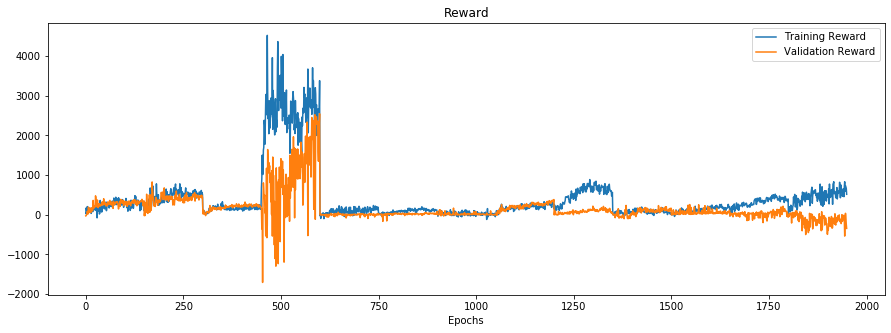

In [4]:
#Training
coloredlogs.install(level='DEBUG')
switch_k_backend_device() #switches to CPU (acc. to author faster than GPU)



reslist_t =[] # Train Reward for plotting
reslist_v = [] # Val Reward for plotting



for column in df_train:
    curent_model = model_name + "_" + column
    print(curent_model)

    #Init agent, if second feature: Window size for state doubled
    
    if df2_train is not None:
        agent = Agent(window_size*2, pretrained=False, model_name=curent_model)
    else:
        agent = Agent(window_size, pretrained=False, model_name=curent_model)
    
    
    #create list as input for model
    df_train_list = list(df_train[column])
    df_val_list = list(df_val[column])

    for i in range(1, ep_count + 1): 
        initial_offset = df_train_list[1] - df_train_list[0]
             
        train_result = train_model(agent, i, df_train_list, df2_train_list, ep_count=ep_count,
                                batch_size=batch_size, window_size=window_size)
        val_result, _ = evaluate_model(agent, df_val_list, df2_val_list, window_size, debug)
        show_train_result(train_result, val_result, initial_offset)
      
        reslist_t.append(train_result[2]) # append reward of training
        reslist_v.append(val_result)
        
# Plotting Training History  
plt.figure(figsize = (15,5))
plt.plot(reslist_t, label = "Training Reward");
plt.plot(reslist_v, label = "Validation Reward");
plt.title("Reward")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## Testing the models
__Test alle generated models with several stocks__

### Load different types of stocks in model:
 - Same stocks for testing then for training
 - Difference to validation in training loop: Every model is tested with __every__ stock

In [5]:
# Plotting function
def visualize(df, history):
    # add history to dataframe
    position = [history[0][0]] + [x[0] for x in history]
    actions = ['HOLD'] + [x[1] for x in history]
    df['position'] = position
    df['action'] = actions
    
    #alt.Chart(df.reset_index()).mark_line().encode(x='index')
    
    # specify y-axis scale for stock prices
    scale = alt.Scale(domain=(min(min(df['actual']), min(df['position'])) - 50, max(max(df['actual']), max(df['position'])) + 50), clamp=True)
    
    # plot a line chart for stock positions
    actual = alt.Chart(df.reset_index()).mark_line(
        color='green',
        opacity=0.5
    ).encode(
        x='Date:T', #'date:T'
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale)
    ).interactive(
        bind_y=False
    )
    
    # plot the BUY and SELL actions as points
    points = alt.Chart(df.reset_index()).transform_filter(
        alt.datum.action != 'HOLD'
    ).mark_point(
        filled=True
    ).encode(
        x=alt.X('Date:T', axis=alt.Axis(title='Date')),
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
        color='action'
        #color=alt.Color('action', scale=alt.Scale(range=['blue', 'red']))
    ).interactive(bind_y=False)

    # merge the two charts
    chart = alt.layer(actual, points, title="your stock").properties(height=300, width=1000)
    
    return chart

I1010 19:30:05.220640 18676 connectionpool.py:813] Starting new HTTPS connection (1): finance.yahoo.com:443
2019-10-10 19:30:05 PC-Stefan urllib3.connectionpool[18784] DEBUG Starting new HTTPS connection (1): finance.yahoo.com:443
I1010 19:30:05.611281 18676 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/ADBE/history?period1=1514775600&period2=1570759199&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
2019-10-10 19:30:05 PC-Stefan urllib3.connectionpool[18784] DEBUG https://finance.yahoo.com:443 "GET /quote/ADBE/history?period1=1514775600&period2=1570759199&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
I1010 19:30:06.064438 18676 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=1514775600&period2=1570759199&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
2019-10-10 19:30:06 PC-Stefan urllib3.connectionpool[18784] DEBUG https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=1514775600&perio

<Figure size 1080x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

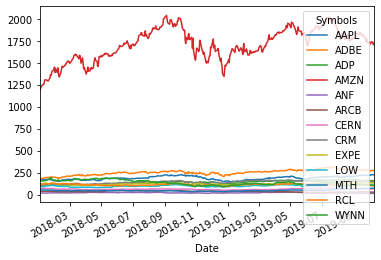

In [6]:
# Loading Test Data
# Setting Start and Enddate for Validation


start_test = datetime.datetime(2018, 1, 1)
end_test = datetime.datetime.now()

# Load Test Data

# Load several stocks
df_test = web.DataReader(TStocks,'yahoo',
                               start=start_test, 
                               end=end_test)['Adj Close']

#Add random column for testing
#df_test['random']=np.random.randint(1,100,df_test.shape[0])
#df_test['sine']=50+50*np.sin(np.linspace(1,100,df_test.shape[0]))

# define second data input
df2_test = web.DataReader('GOLD','yahoo',
                               start=start_test, end=end_test)

# Convert df2_test to list
df2_test_list = list(df2_test['Adj Close'])

plt.figure(figsize = (15,5))
plt.figure();
df_test.plot();

In [23]:
#print(TStocks)
#newDF = pd.DataFrame(columns = TStocks)
#newDF.head()

ndf = pd.DataFrame(columns =['a','b', 'c'])
#for 1, (a,b,c)


ndf.head()
ndf.loc[len(ndf)]=[1,2,3]
ndf.head()

df_cols = ['Model'] + TStocks

newDF2 = pd.DataFrame(columns = df_cols)

print(df_cols)
print(newDF2.head())

['Model', 'ADBE', 'AAPL', 'AMZN', 'CERN', 'CRM', 'EXPE', 'RCL', 'WYNN', 'ADP', 'LOW', 'ARCB', 'ANF', 'MTH']
Empty DataFrame
Columns: [Model, ADBE, AAPL, AMZN, CERN, CRM, EXPE, RCL, WYNN, ADP, LOW, ARCB, ANF, MTH]
Index: []


In [ ]:
# Loop over all Models and test them
# If window size does not fit, pass and try next model


count = 0
df_cols = ['Model'] + TStocks +['Sum']
df_result = pd.DataFrame(columns = df_cols)
for models in os.listdir("models/"):
    
   
    model_name = models
    
    # Init Model
    window_size = 12
    res_list =[]
    
    
    #try: 
    # Initialize Agent
    if df2_test_list is not None:
        agent = Agent(window_size*2, pretrained=True, model_name=model_name)
    else:
        agent = Agent(window_size, pretrained=True, model_name=model_name)
    
    res_list =[]
    count
    sum = 0
    # Loop over stocks
    for column in df_test:
        #print(column)
        #rename feature column name
        df_test_list = list(df_test[column])
        initialprice = df_test_list[0]
        print("inprice",initialprice)
        dft = df_test.rename(columns={column: 'actual'})
        initial_offset = df_test_list[1] - df_test_list[0]
        val_result, history = evaluate_model(agent, df_test_list, df2_test_list, window_size, debug)
        #show_eval_result(model_name, val_result, initial_offset);
        #chart = visualize(dft, history)
        res_list.append(val_result/initialprice)
        
        sum = sum+val_result
           #print("Earnings of Model: ", model_name, " is: ", val_result)
        #chart.display()
    print("Sum of all earnings: ", model_name, " is: ", sum)
    
    df_result.loc[count]=[column] + res_list + [sum]

#except: 
    print(models, "wrong windowsize")
    #pass
    
print(result)

inprice 167.70188903808594
inprice 177.6999969482422
inprice 111.90599060058594
inprice 1189.010009765625
inprice 16.97504425048828
inprice 36.385963439941406
inprice 68.21959686279297
inprice 104.41000366210938
inprice 119.2204818725586
inprice 88.64240264892578
inprice 52.5
inprice 115.513427734375
inprice 157.3359832763672
Sum of all earnings:  model_w12v4_AAPL_10  is:  -547.2160720825195
model_w12v4_AAPL_10 wrong windowsize
inprice 167.70188903808594
inprice 177.6999969482422
inprice 111.90599060058594
inprice 1189.010009765625
inprice 16.97504425048828
inprice 36.385963439941406
inprice 68.21959686279297
inprice 104.41000366210938
inprice 119.2204818725586
inprice 88.64240264892578
inprice 52.5
inprice 115.513427734375
inprice 157.3359832763672
Sum of all earnings:  model_w12v4_AAPL_100  is:  2136.4049501419067
model_w12v4_AAPL_100 wrong windowsize
inprice 167.70188903808594
inprice 177.6999969482422
inprice 111.90599060058594
inprice 1189.010009765625
inprice 16.97504425048828
in

model_w12v4_ADBE_120 wrong windowsize
inprice 167.70188903808594
inprice 177.6999969482422
inprice 111.90599060058594
inprice 1189.010009765625
inprice 16.97504425048828
inprice 36.385963439941406
inprice 68.21959686279297
inprice 104.41000366210938
inprice 119.2204818725586
inprice 88.64240264892578
inprice 52.5
inprice 115.513427734375
inprice 157.3359832763672
Sum of all earnings:  model_w12v4_ADBE_130  is:  3019.5019750595093
model_w12v4_ADBE_130 wrong windowsize
inprice 167.70188903808594
inprice 177.6999969482422
inprice 111.90599060058594
inprice 1189.010009765625
inprice 16.97504425048828
inprice 36.385963439941406
inprice 68.21959686279297
inprice 104.41000366210938
inprice 119.2204818725586
inprice 88.64240264892578
inprice 52.5
inprice 115.513427734375
inprice 157.3359832763672
Sum of all earnings:  model_w12v4_ADBE_140  is:  3150.047529220581
model_w12v4_ADBE_140 wrong windowsize
inprice 167.70188903808594
inprice 177.6999969482422
inprice 111.90599060058594
inprice 1189.01

In [29]:
df_result.loc[count]=[column] + res_list
df_result.head()

Model      ADBE      AAPL      AMZN      CERN       CRM      EXPE       RCL  \
0  WYNN  1.086941  0.824873  0.357704 -0.308635 -1.458066  0.234074  0.187682   

       WYNN      ADP       LOW  ARCB       ANF       MTH  
0  0.816684 -0.47409 -1.588267   0.7 -1.566819 -1.839564

In [ ]:
# Initial Price
init_price = list(df_test.iloc[0])
dft.head()
print(result)


In [ ]:
res_array =np.zeros(5)
res_array2 = np.ones(5)
res
val_result = 6
colum = 1
print(res_array)
print(res_array2)
#res_array[:,:] = val_result

In [ ]:
tx1 = model_name + " = " + str(sum)
print(tx1)
result.append(tx1)
print(result)

I1010 21:03:30.057007 18676 evaluate.py:111] model_w12v4_MTH_90: +$336.42

2019-10-10 21:03:30 PC-Stefan root[18784] INFO model_w12v4_MTH_90: +$336.42



Earnings of :  AAPL  is:  336.41943359375


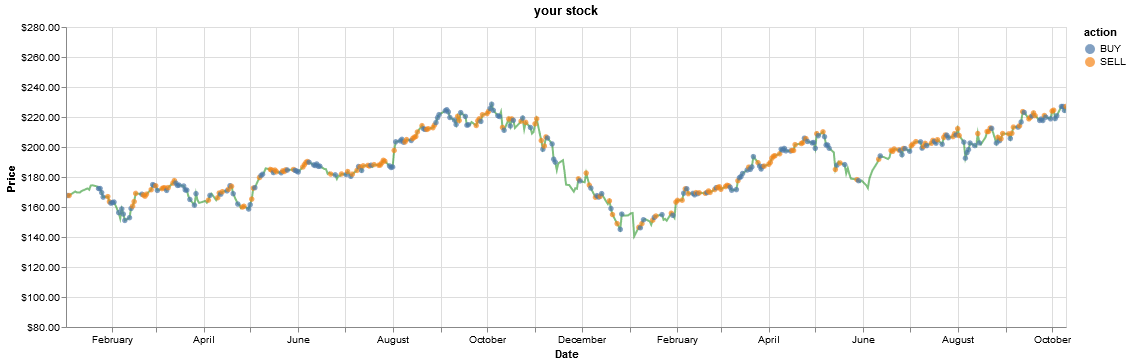

I1010 21:03:32.463438 18676 evaluate.py:111] model_w12v4_MTH_90: +$736.95

2019-10-10 21:03:32 PC-Stefan root[18784] INFO model_w12v4_MTH_90: +$736.95



Earnings of :  ADBE  is:  736.9498443603516


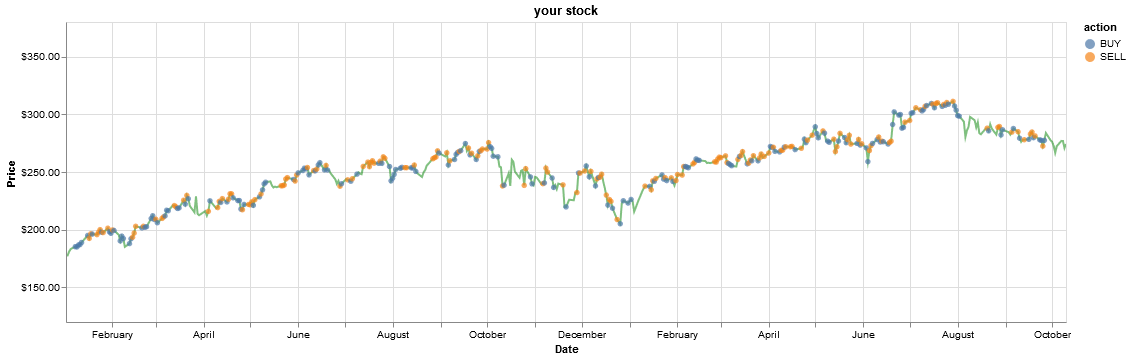

I1010 21:03:34.682316 18676 evaluate.py:111] model_w12v4_MTH_90: +$87.81

2019-10-10 21:03:34 PC-Stefan root[18784] INFO model_w12v4_MTH_90: +$87.81



Earnings of :  ADP  is:  87.80887603759766


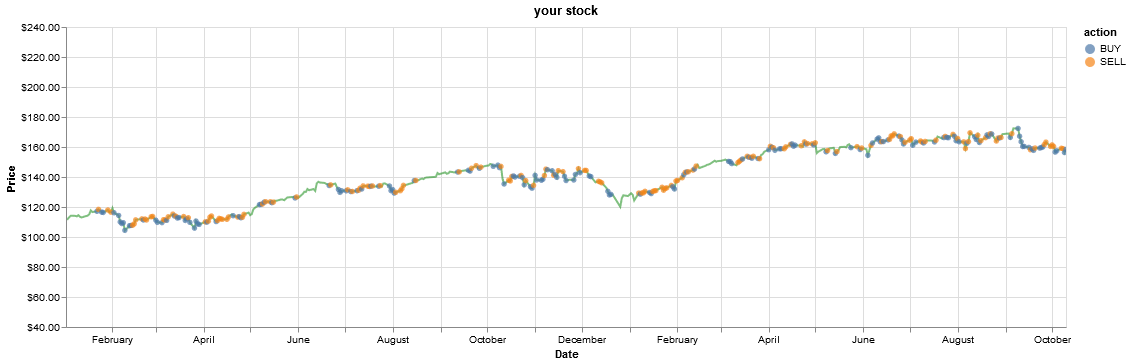

I1010 21:03:37.057488 18676 evaluate.py:111] model_w12v4_MTH_90: +$5625.74

2019-10-10 21:03:37 PC-Stefan root[18784] INFO model_w12v4_MTH_90: +$5625.74



Earnings of :  AMZN  is:  5625.740234375


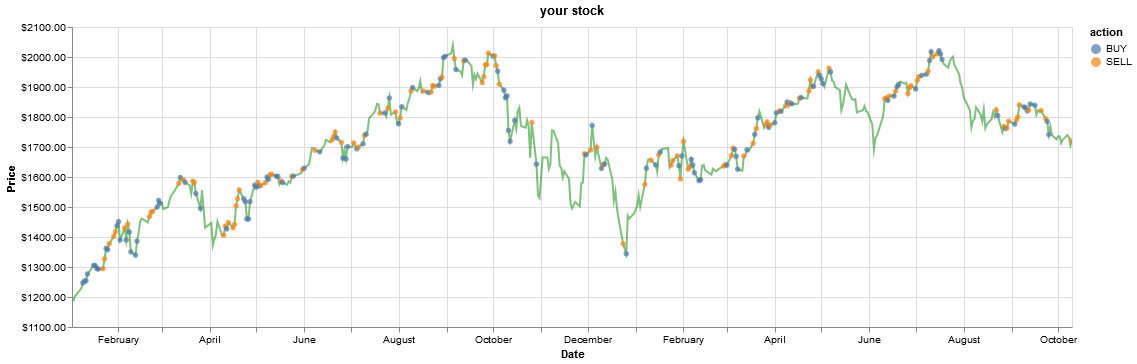

I1010 21:03:39.337873 18676 evaluate.py:111] model_w12v4_MTH_90: +$4.45

2019-10-10 21:03:39 PC-Stefan root[18784] INFO model_w12v4_MTH_90: +$4.45



Earnings of :  ANF  is:  4.449787139892578


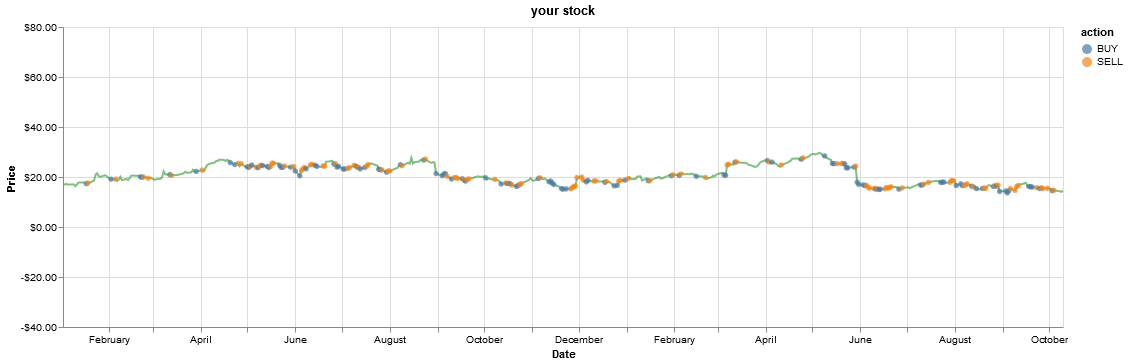

I1010 21:03:41.713031 18676 evaluate.py:111] model_w12v4_MTH_90: +$0.10

2019-10-10 21:03:41 PC-Stefan root[18784] INFO model_w12v4_MTH_90: +$0.10



Earnings of :  ARCB  is:  0.09551048278808594


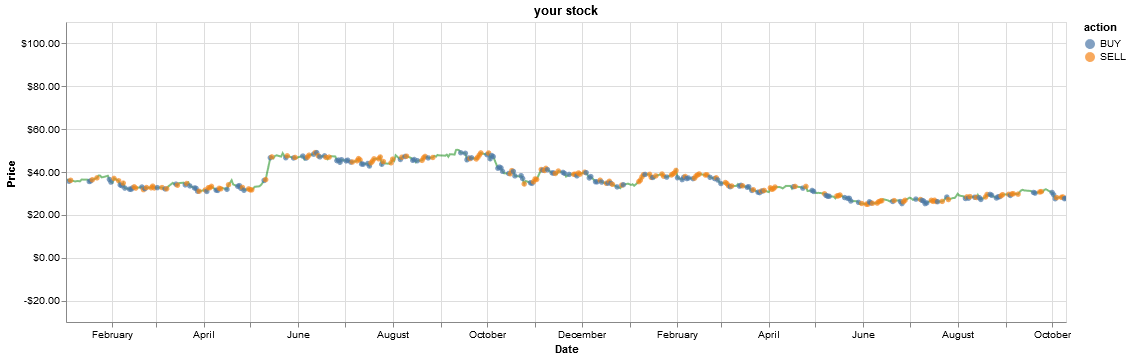

I1010 21:03:43.979859 18676 evaluate.py:111] model_w12v4_MTH_90: +$30.37

2019-10-10 21:03:43 PC-Stefan root[18784] INFO model_w12v4_MTH_90: +$30.37



Earnings of :  CERN  is:  30.37350082397461


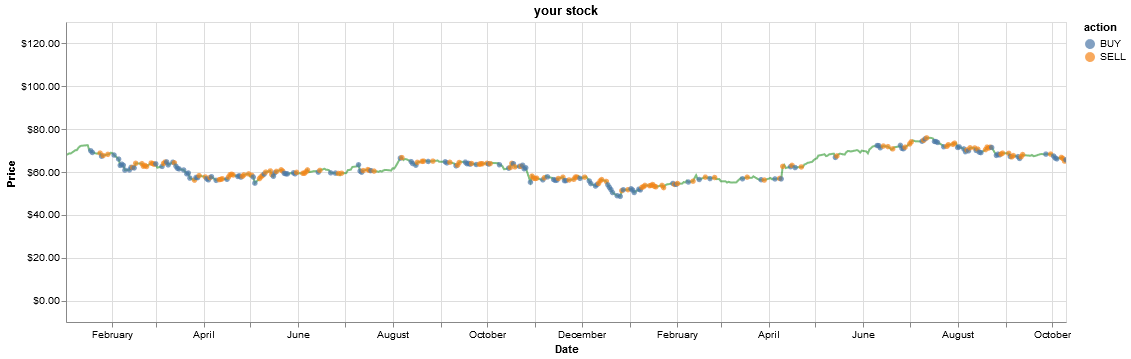

I1010 21:03:46.183131 18676 evaluate.py:111] model_w12v4_MTH_90: +$472.33

2019-10-10 21:03:46 PC-Stefan root[18784] INFO model_w12v4_MTH_90: +$472.33



Earnings of :  CRM  is:  472.3300018310547


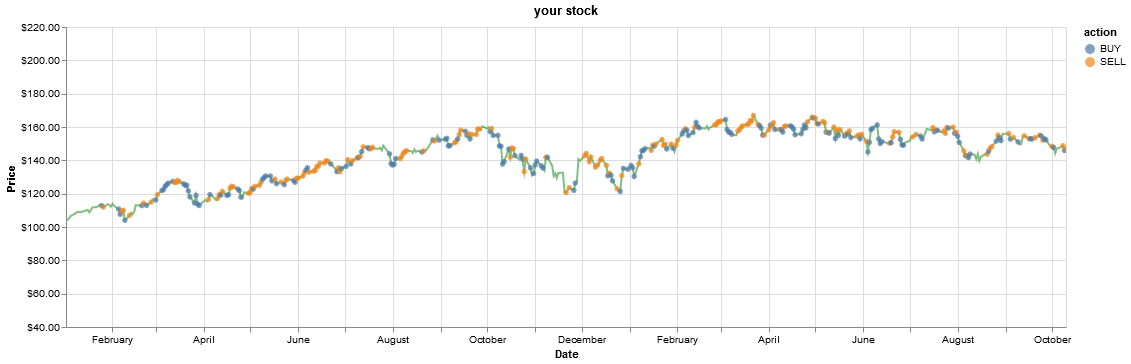

I1010 21:03:48.495796 18676 evaluate.py:111] model_w12v4_MTH_90: +$121.31

2019-10-10 21:03:48 PC-Stefan root[18784] INFO model_w12v4_MTH_90: +$121.31



Earnings of :  EXPE  is:  121.30860900878906


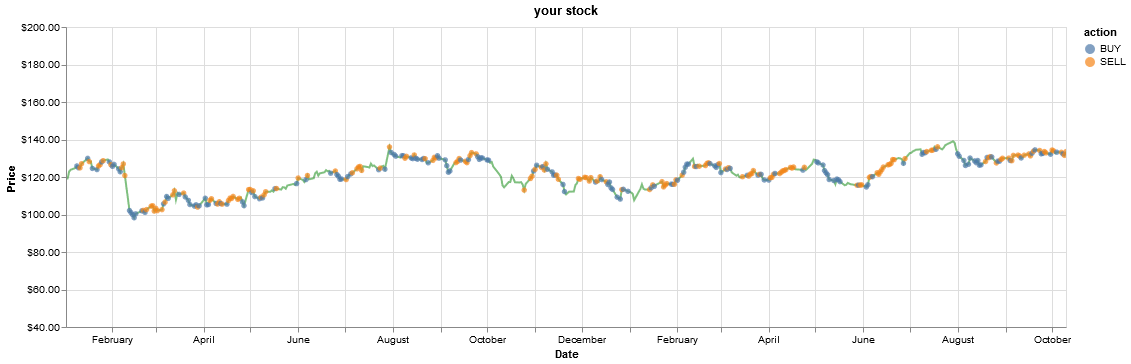

I1010 21:03:50.667806 18676 evaluate.py:111] model_w12v4_MTH_90: +$21.02

2019-10-10 21:03:50 PC-Stefan root[18784] INFO model_w12v4_MTH_90: +$21.02



Earnings of :  LOW  is:  21.020362854003906


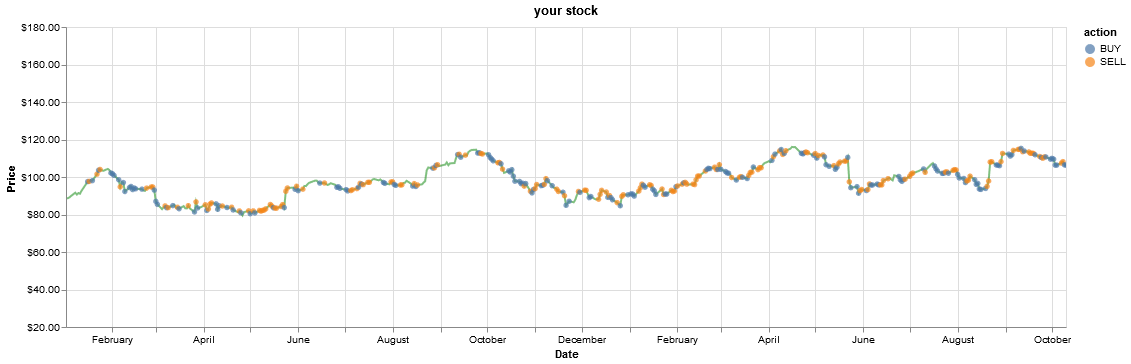

I1010 21:03:52.855452 18676 evaluate.py:111] model_w12v4_MTH_90: +$90.96

2019-10-10 21:03:52 PC-Stefan root[18784] INFO model_w12v4_MTH_90: +$90.96



Earnings of :  MTH  is:  90.96001052856445


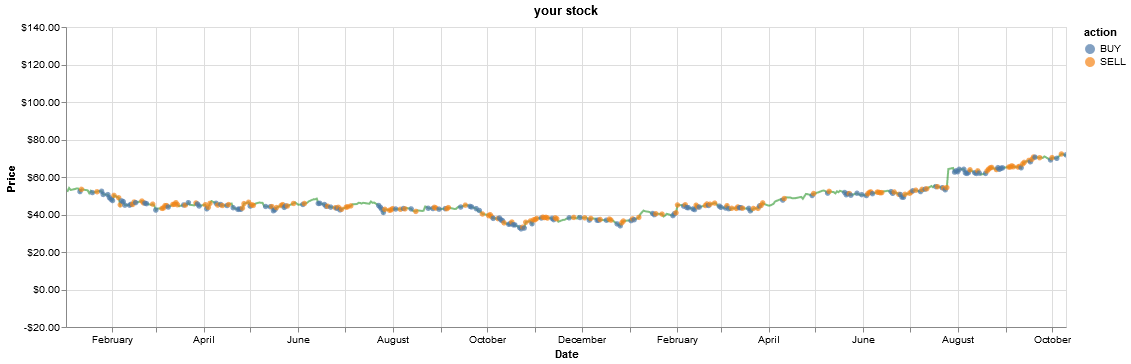

I1010 21:03:55.183731 18676 evaluate.py:111] model_w12v4_MTH_90: -$71.95

2019-10-10 21:03:55 PC-Stefan root[18784] INFO model_w12v4_MTH_90: -$71.95



Earnings of :  RCL  is:  -71.94956970214844


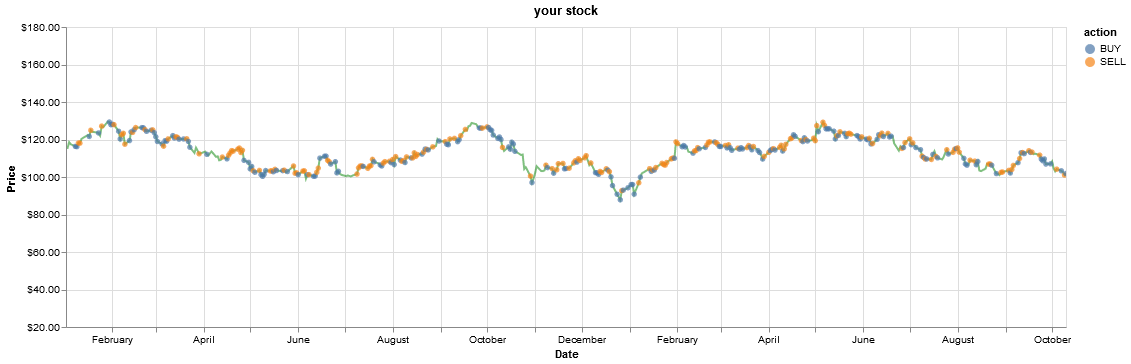

I1010 21:03:57.496385 18676 evaluate.py:111] model_w12v4_MTH_90: -$650.09

2019-10-10 21:03:57 PC-Stefan root[18784] INFO model_w12v4_MTH_90: -$650.09



Earnings of :  WYNN  is:  -650.085205078125


Sum of all earnings:  model_w12v4_MTH_90  is:  6805.421396255493


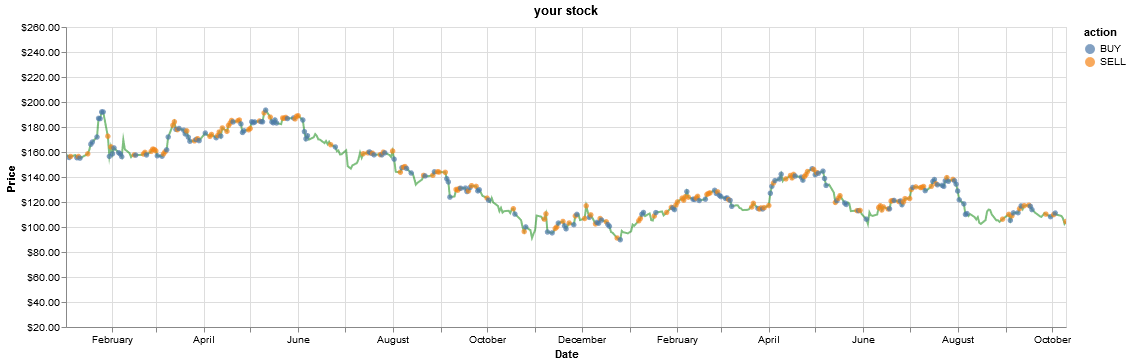

In [9]:
# Test 1 model
    
#model_name = 'model_w15v2_40' model_Stefan_10
model_name = "model_w12v4_MTH_90"

# Init Model
window_size = 12


# Initialize Agent
if df2_test_list is not None:
    agent = Agent(window_size*2, pretrained=True, model_name=model_name)
else:
    agent = Agent(window_size, pretrained=True, model_name=model_name)

sum = 0
# Loop over stocks
for column in df_test:
    #print(column)
    #rename feature column name
    df_test_list = list(df_test[column])
    dft = df_test.rename(columns={column: 'actual'})
    initial_offset = df_test_list[1] - df_test_list[0]
    val_result, history = evaluate_model(agent, df_test_list, df2_test_list, window_size, debug)
    show_eval_result(model_name, val_result, initial_offset);
    chart = visualize(dft, history)
    sum = sum+val_result
    print("Earnings of : ", column, " is: ", val_result)
    chart.display()
print("Sum of all earnings: ", model_name, " is: ", sum)


In [ ]:
dft.head(200)